# INN Hotels Project


## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV



# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
hotel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised_learning_classification/INNHotelsGroup.csv')
df=hotel.copy()
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Data Overview


### View the first and last 5 rows of the dataset.

In [ ]:
# returns the first 5 rows
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# returns the last 5 rows
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

### Understand the shape of the dataset.

In [ ]:
#shape of the data
df.shape

(36275, 19)

There are 36275 rows and 19 columns.

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are 13 Integer type columns , 5 string/object type columns and 1 float type column.

### Statistical summary

In [ ]:
#statistical summary for the numeric data
df.describe(include='all').T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   

1. type_of_meal_plan and room_type_reserved: There are four types of meal plans and seven room types. The most common meal plan is "Meal Plan 1," and the most common room type is "Room_Type 1."

2. no_of_previous_cancellations: The majority of guests (about 97.7%) have not made any previous cancellations.

3. no_of_children and no_of_adults: Most guests have no children (about 92.5% with 0 children) and Guests with one/two adults (about 92.8% ).

4. market_segment_type: The most common market segment is "Online," comprising about 63.9% of the guests.

5. lead_time: The average lead time for bookings is around 85.23 days.

6. booking_status: Most bookings are marked as "Not_Canceled," indicating that a significant portion of reservations are not canceled.

7. avg_price_per_room: The average price per room is approximately 103.42, with a standard deviation of 35.09.

8. arrival_year, arrival_month, and arrival_date: The data primarily consists of records from the year 2018, with various arrival months and dates. The most common arrival month is July (7), and the most common arrival date is the 16th.

In [ ]:
# filtering object type columns
cat_columns = df.describe(include=["object"]).columns
cat_columns


Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [ ]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("__" * 50)

Unique values in Booking_ID are :
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64
____________________________________________________________________________________________________
Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
____________________________________________________________________________________________________
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
____________________________________________________________________________________________________
Unique values in market_segment_type are :
Online           23214
Of

### Checking for missing values

In [ ]:
#Check for missing values
df.isna().sum().sort_values(ascending=False)

Booking_ID                              0
arrival_month                           0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_year                            0
no_of_adults                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
no_of_children                          0
booking_status                          0
dtype: int64

There are no missing values in the dataset

### Checking for duplicate values

In [ ]:
#check for duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset.

**Let's drop the Booking_ID column first before we proceed forward**.

In [ ]:
df= df.drop('Booking_ID',axis=1)

## Exploratory Data Analysis (EDA)

###Functions for EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Booking status =" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of Booking Status =" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t Booking Status")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t Booking Status")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on number of adults and number of children

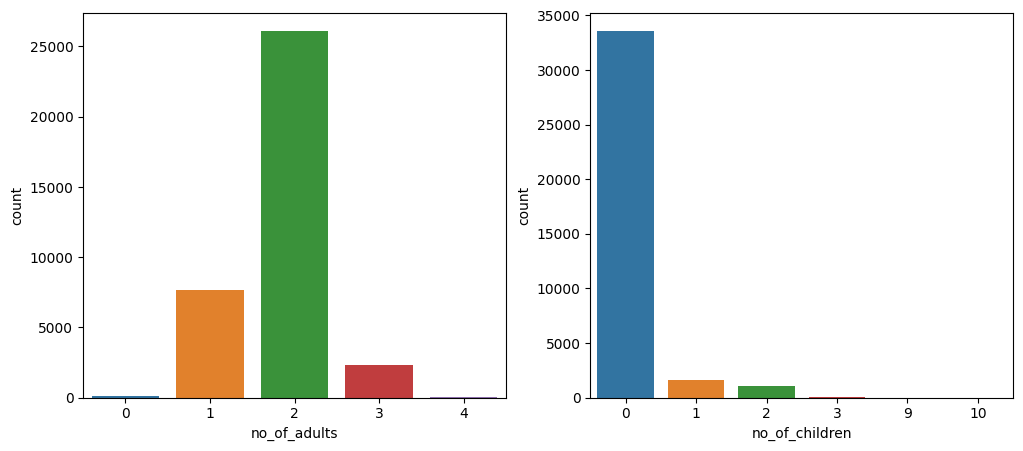

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="no_of_adults")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="no_of_children")
plt.show()


In [ ]:
df['no_of_adults'].value_counts(normalize=True)

2   0.71972
1   0.21213
3   0.06387
0   0.00383
4   0.00044
Name: no_of_adults, dtype: float64

In [ ]:
df['no_of_children'].value_counts(normalize=True)

0    0.92562
1    0.04460
2    0.02917
3    0.00052
9    0.00006
10   0.00003
Name: no_of_children, dtype: float64

In [ ]:
df[df['no_of_children'] > 8]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
6338          37          2018              1            12   
10041         11          2017             10            11   
10061          8          2017              8            13   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338               Online               0                             0   
10041           Corporate               0                             0   
10061              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                      0            84.45000   
10041                                     0            95.00000   
10061                                     0            76.50000   

       no_of_special_requests booking_status  
6338                        1   Not_Canceled  
10041                       0   Not_Canceled  
10061                       1       Canceled

In [ ]:
df[(df['no_of_adults']==0) & (df['no_of_children'] == 0)].shape

(0, 18)

`no_of_adults`: Around 72% of the data is with guests as 2 adults.

`no_of_children`: Around 92% of the data is with 0 children and there are 3 records with more than 8 children, those records could be any field trip meaning could be real data too. Not treating this outliers.

#### Observations on number of week nights and number of weekend nights

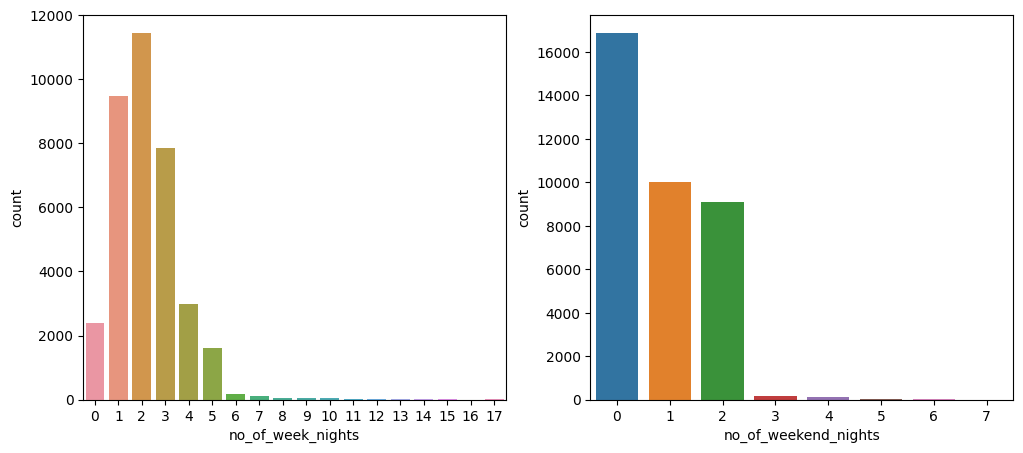

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="no_of_week_nights")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="no_of_weekend_nights")
plt.show()


In [ ]:
#Checking to see if there are any records with number of days totally as 0
df[(df['no_of_week_nights']== 0) & (df['no_of_weekend_nights']==0)].shape

(78, 18)

In [ ]:
#imputing this values with median
count = 0
for index, row in df.iterrows():
    if (row['no_of_week_nights'] == 0) and (row['no_of_weekend_nights'] == 0):
        df.at[index, 'no_of_week_nights'] = np.nan
        df.at[index, 'no_of_weekend_nights'] = np.nan
        count += 1

print(count)

78


In [ ]:
# Group by 'market_segment_type' and 'room_type' and replace NaN with median
df['no_of_week_nights'] = df.groupby(['market_segment_type', 'room_type_reserved'])['no_of_week_nights'].transform(lambda x: x.fillna(x.median()))
df['no_of_weekend_nights'] = df.groupby(['market_segment_type', 'room_type_reserved'])['no_of_weekend_nights'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['no_of_week_nights']=df['no_of_week_nights'].astype('int64')
df['no_of_weekend_nights']=df['no_of_weekend_nights'].astype('int64')

In [ ]:
#total number of days stayed/booked
df['num_days_total']= df['no_of_week_nights']+df['no_of_weekend_nights']

In [ ]:
df.groupby('num_days_total',as_index=False)['no_of_week_nights','no_of_weekend_nights'].value_counts().sort_values(by='num_days_total',ascending=False)

num_days_total  no_of_week_nights  no_of_weekend_nights  count
49              24                 17                     7      1
48              23                 17                     6      2
47              22                 16                     6      2
46              21                 15                     6      4
45              20                 15                     5      5
44              20                 14                     6      6
43              19                 15                     4      1
42              19                 14                     5      1
41              19                 13                     6      4
39              18                 12                     6      2
40              18                 13                     5      1
38              17                 12                     5      5
37              16                 12                     4      2
36              16                 11                     5      4
35              15                 11                     4     13
34              15                 10                     5     18
33              14                 10                     4     32
32              13                 10                     3      7
31              13                  9                     4     11
30              12                 10                     2      5
29              12                  9                     3      9
28              12                  8                     4     10
26              11                  9                     2     14
27              11                  7                     4     11
25              11                  8                     3     14
23              10                  8                     2     38
22              10                  7                     3     39
24              10                  6                     4     32
21               9                  5                     4     17
20               9                  6                     3     31
19               9                  7                     2     63
18               8                  5                     3     53
17               8                  6                     2    126
16               7                  5                     2    973
14               6                  4                     2    718
15               6                  5                     1    313
12               5                  4                     1    743
11               5                  3                     2   1588
13               5                  5                     0    258
10               4                  4                     0   1529
9                4                  3                     1   2071
8                4                  2                     2   2293
7                3                  1                     2   2466
6                3                  2                     1   3471
5                3                  3                     0   4180
2                2                  2                     0   5745
4                2                  0                     2    787
3                2                  1                     1   1940
1                1                  0                     1   1522
0                1                  1                     0   5095

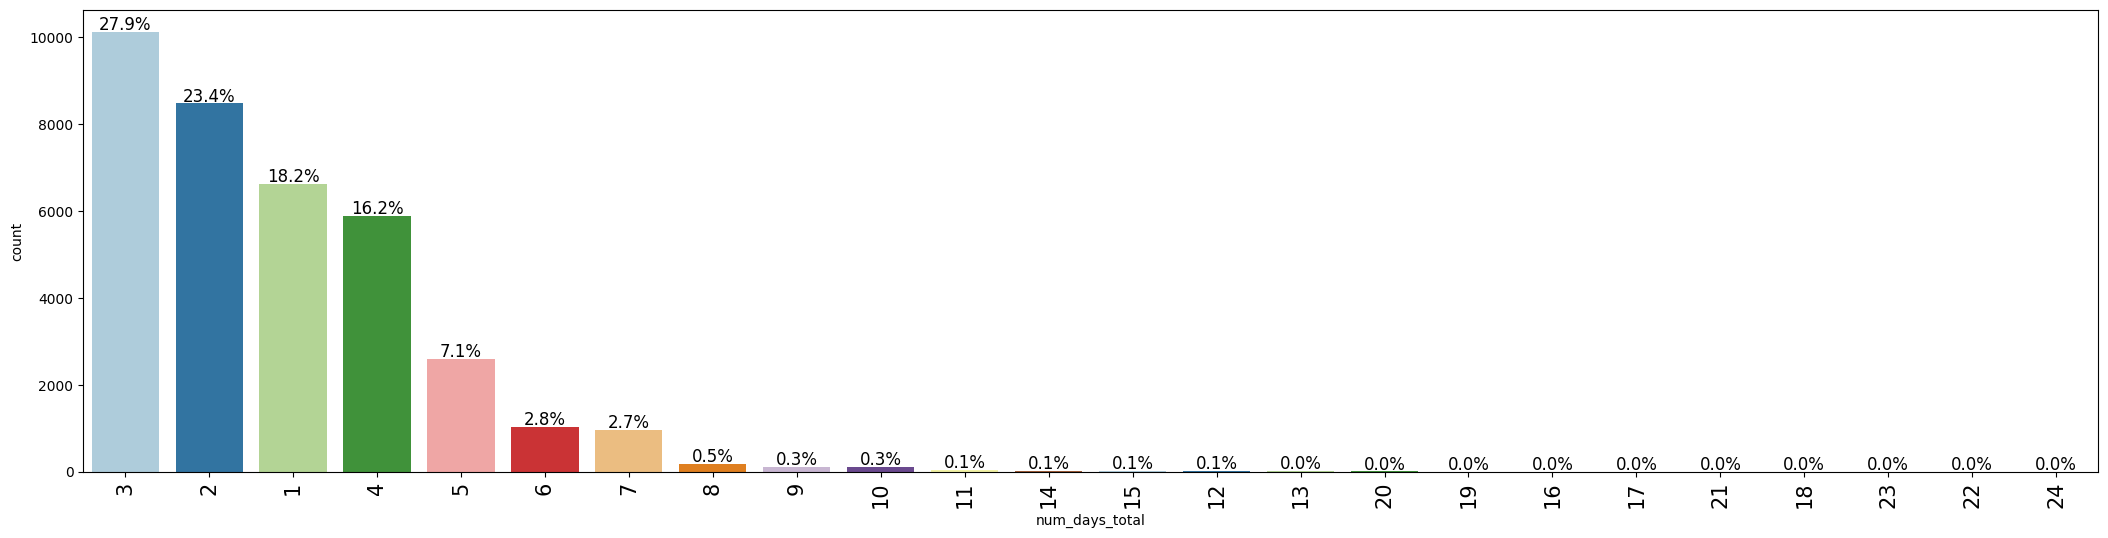

In [ ]:
labeled_barplot(df,'num_days_total',perc=True)

Around 70% of the people stayed/booked are for within 1 to 3 days range. Found some records with 0 weeknights and 0 weekdays stayed, so imputed those values with the median.

#### Observations on type of meal plan

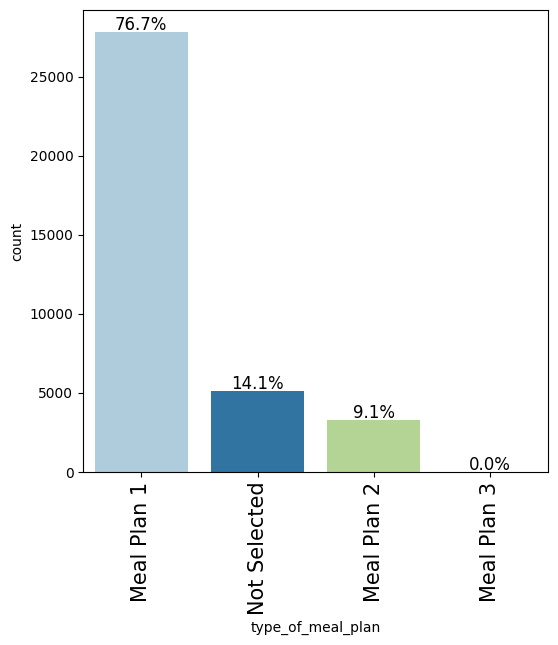

In [ ]:
labeled_barplot(df,'type_of_meal_plan',perc=True)

Most booking are made for Meal Plan 1 (i.e., breakfast only) and negligible for Meal Plan 3 (i.e, all 3 meals). Several do not select the meal plan

#### Observations on required car parking space

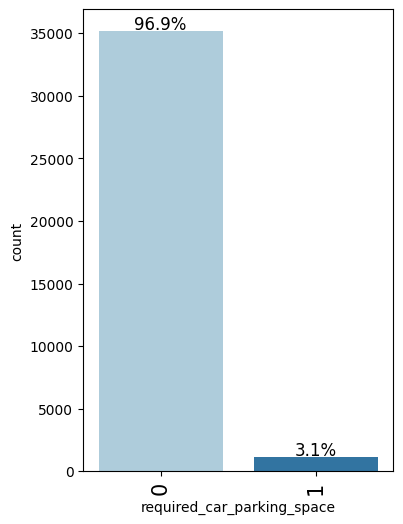

In [ ]:
labeled_barplot(df,'required_car_parking_space',perc=True)

Majority of the guests don't need a car parking space (97%)

#### Observations on room type reserved

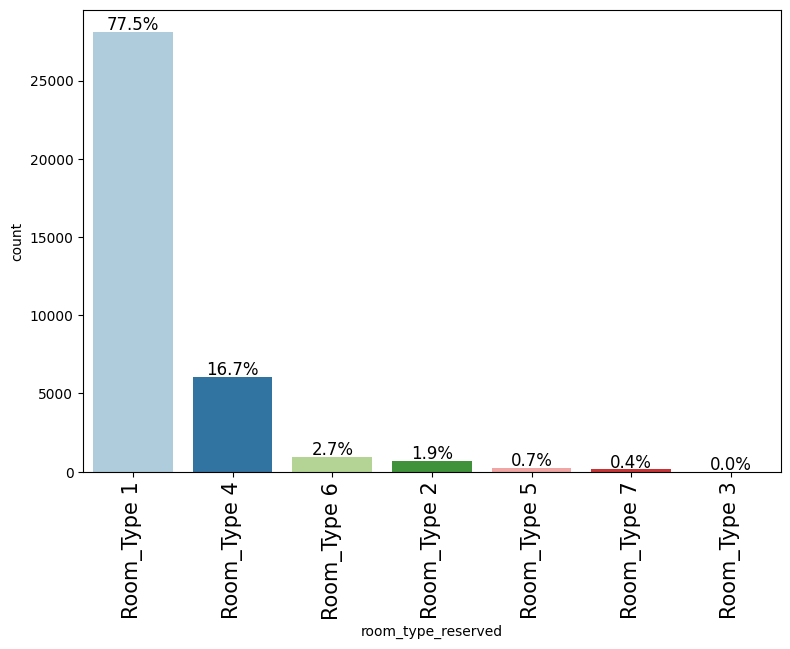

In [ ]:
labeled_barplot(df,'room_type_reserved',perc=True)

Most bookings are encoded as Room_type 1, followed by Room_type 4 & Room_type 6.

#### Observations on lead time

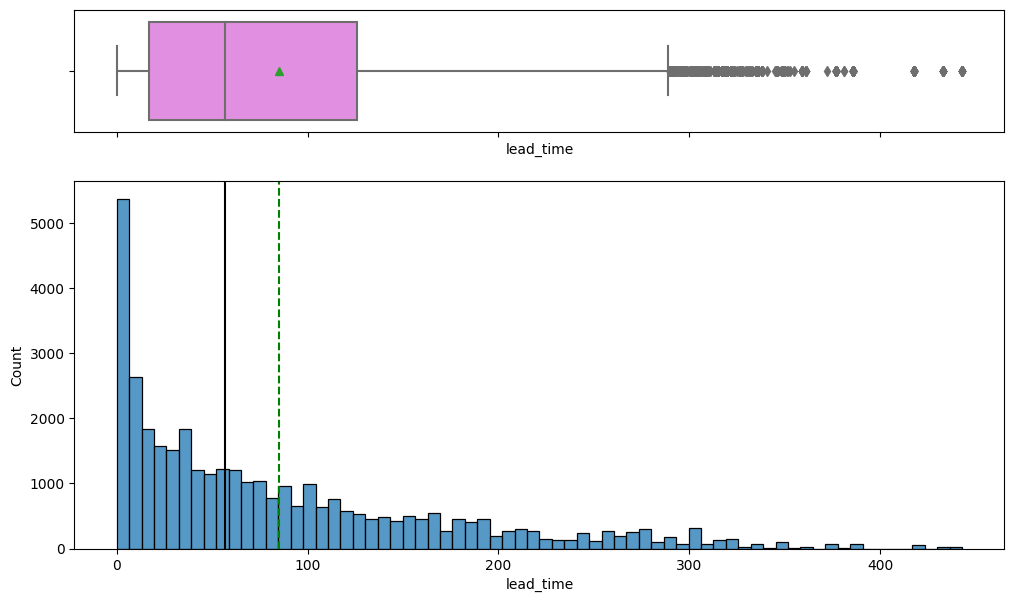

In [ ]:
histogram_boxplot(df, "lead_time")

The majority of guests tend to make their bookings within approximately three months or 90 days before the check-in date. The 'lead_time' distribution exhibits a right-skewed pattern, with a significant number of outliers occurring for lead times greater than six months or 240 days.

#### Observations on arrival month, arrival year, arrival date

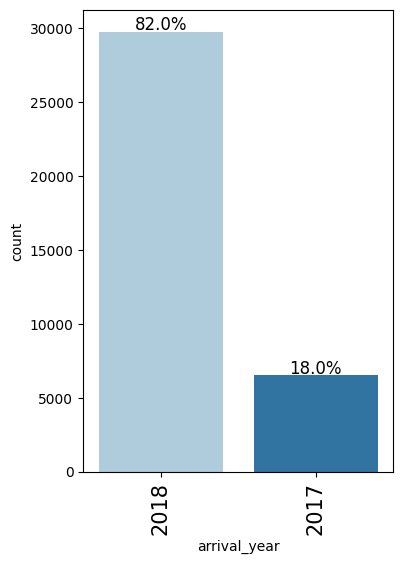

In [ ]:
labeled_barplot(df,'arrival_year',perc=True)

In [ ]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

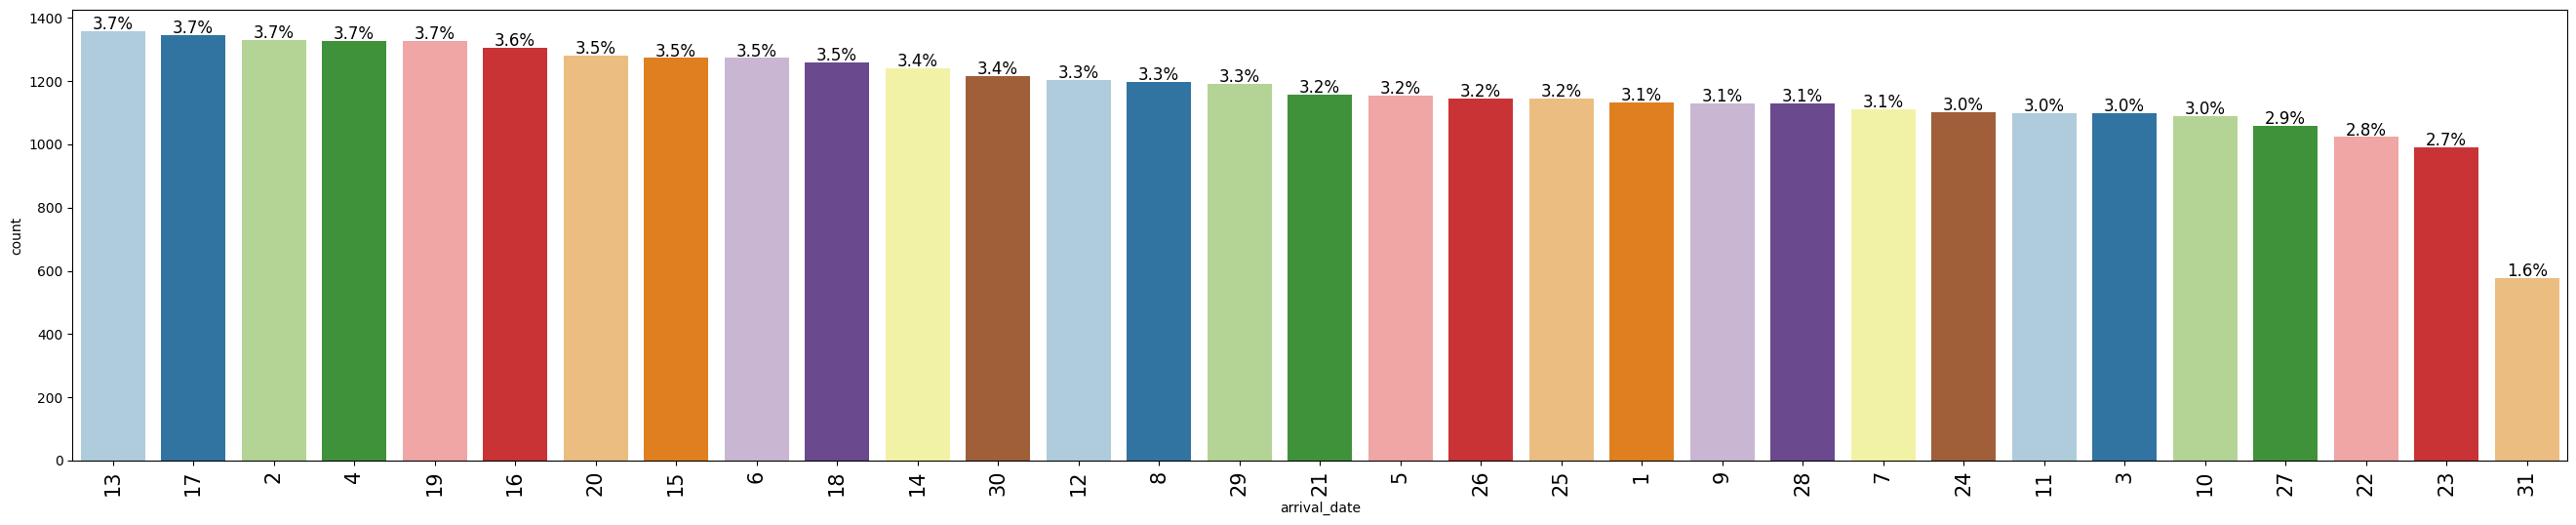

In [ ]:
labeled_barplot(df,'arrival_date',perc=True)

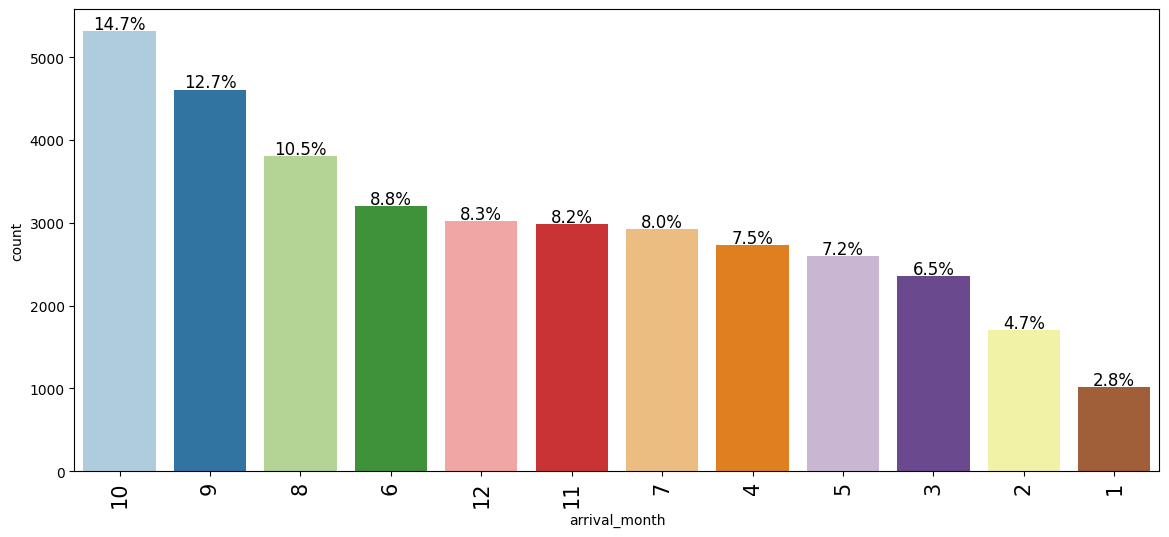

In [ ]:
labeled_barplot(df,'arrival_month',perc=True)

The month of October garners the highest share of bookings. The three most bustling months, ranked in decreasing order, are October, September, and August.

January records the fewest bookings. The year 2018 witnesses the highest bookings at 82%, and the distribution of bookings across dates remains relatively uniform, hovering around 3% to 4%.

#### Observations on market segment type

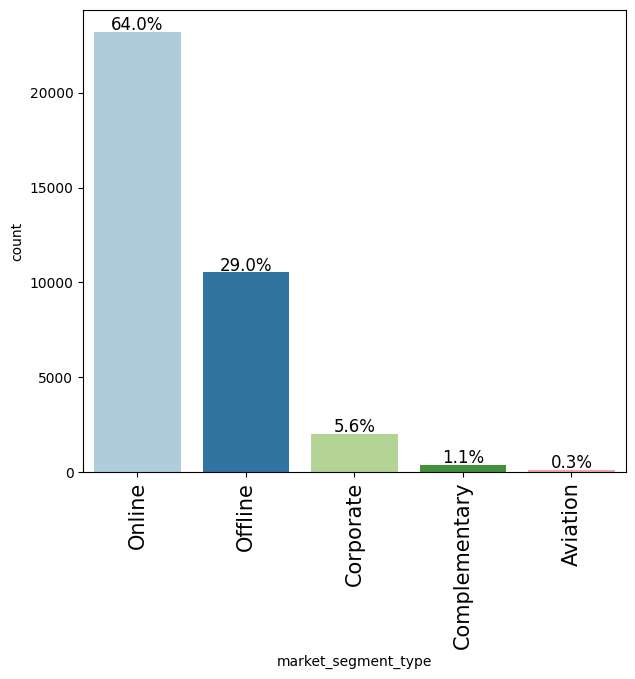

In [ ]:
labeled_barplot(df,'market_segment_type',perc=True)

The majority of bookings, accounting for 64%, are made through online channels, followed by offline bookings, corporate bookings, and, lastly, complimentary bookings.

#### Observations on Repeated guests

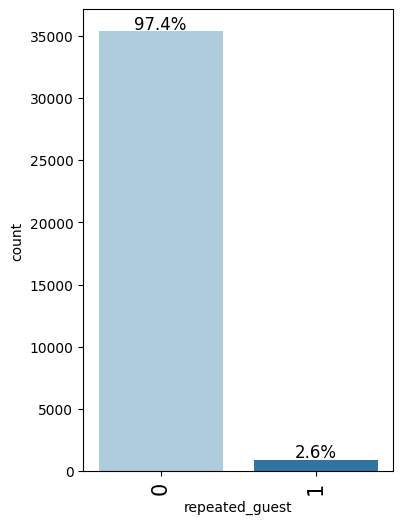

In [ ]:
labeled_barplot(df, "repeated_guest",perc=True)

97% of the guests are non repeating.

####Observations on number of previous booking cancellations and not cancellations

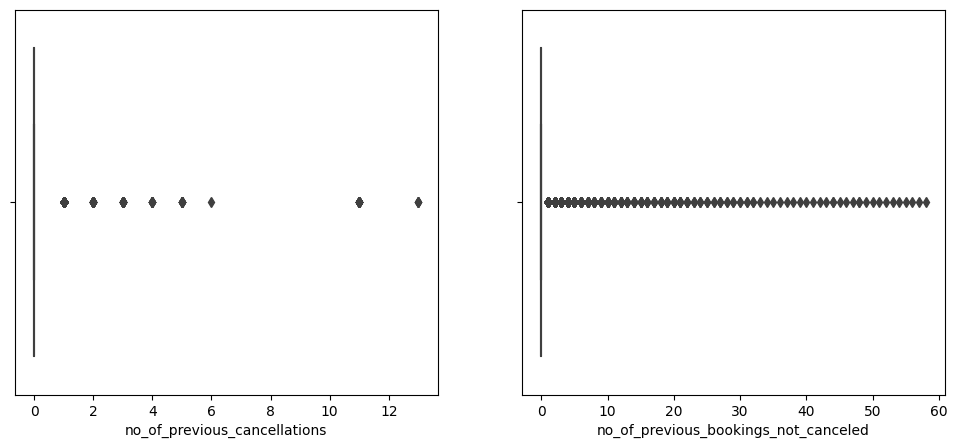

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="no_of_previous_cancellations")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="no_of_previous_bookings_not_canceled")
plt.show()

In [ ]:
df[df['no_of_previous_bookings_not_canceled'] >0].shape

(812, 19)

The majority of guests have zero values for both "no_of_previous_cancellations" and "no_of_previous_bookings_not_cancelled." This is likely because they are new guests rather than repeated guests. However, there are a few outliers with a high number of prior cancellations, ranging from 2 to 12, possibly due to fluctuations in prices.


Similarly, "no_of_previous_bookings_not_cancelled" also shows a predominant value of 0, for similar reasons. Nonetheless, there are several outliers with a significant number of previous bookings that were not canceled, with counts ranging from 1 to 70. This suggests that among the limited number of repeated guests, the majority have had prior bookings and, presumably, positive experiences with the hotel. The total count of these outliers is 812, out of approximately 33,000 total records.

#### Observations on average price per room

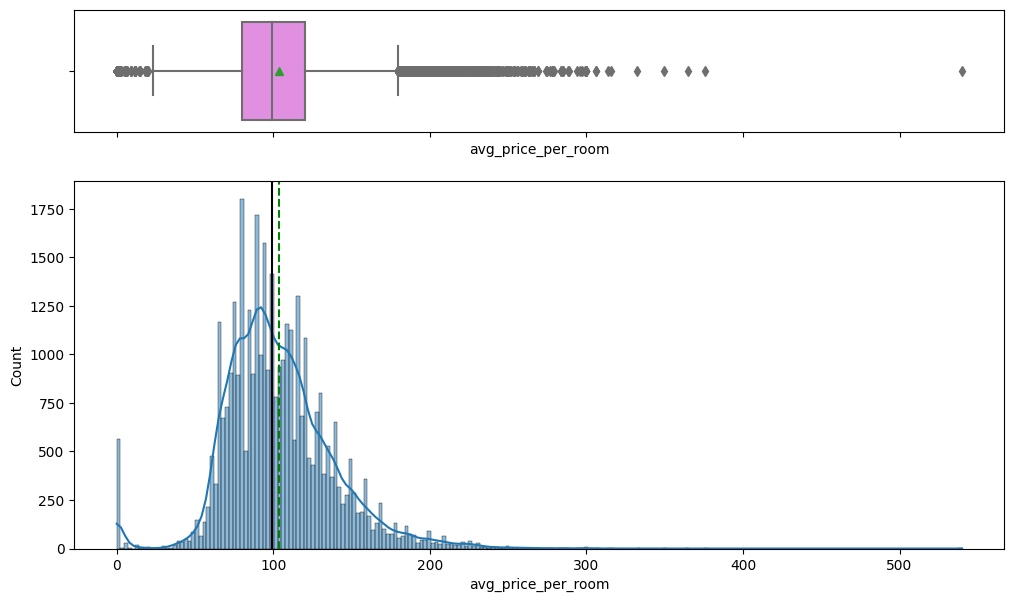

In [ ]:
histogram_boxplot(df, 'avg_price_per_room',kde=True)

In [ ]:
# how many free rooms does the hotel give away?
df[df['avg_price_per_room']==0]['market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

The average price per room per day of reservation exhibits a right-skewed distribution with a couple of outliers exceeding £200.

Around 545 bookings, which is approximately 2%, are for free or complimentary rooms.


#### Observations on number of special requests

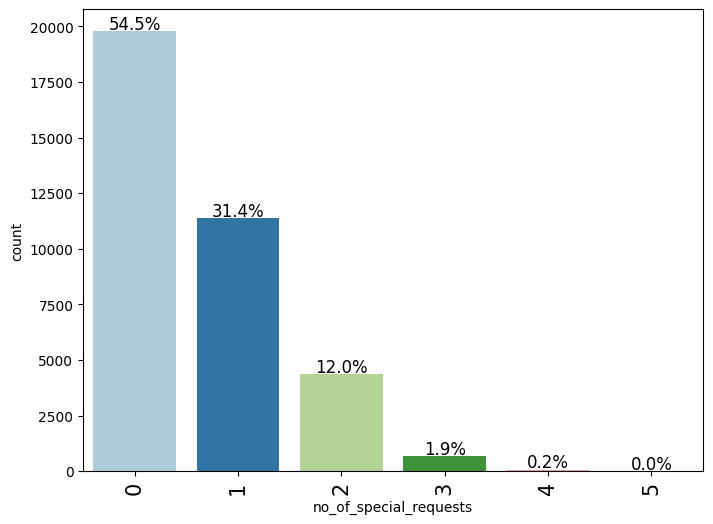

In [ ]:
labeled_barplot(df,'no_of_special_requests',perc=True)

The majority of guests do not make any special requests, while some others have either one or two special requests. However, there are a few outliers who have made as many as five special requests.

#### Observations on booking status

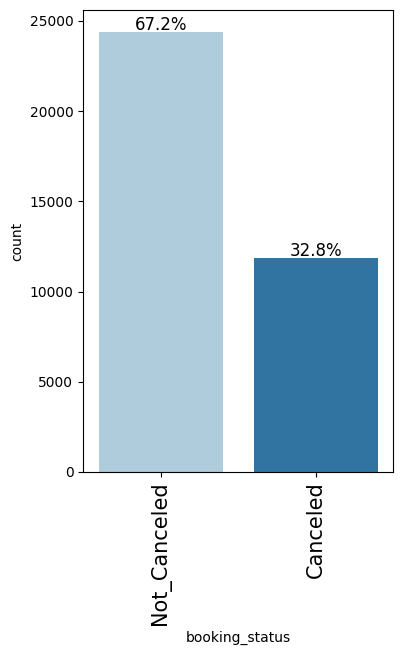

In [ ]:
labeled_barplot(df,'booking_status',perc=True)

More than two-thirds of bookings are not cancelled, while the remaining one-third is cancelled

###Leading Questions:

####1. What are the busiest months in the hotel?

In [ ]:
df['arrival_month'].value_counts(normalize=True).sort_values(ascending=False).head(5)

10   0.14657
9    0.12711
8    0.10511
6    0.08830
12   0.08328
Name: arrival_month, dtype: float64

**October** is the busiest month in the hotel with 15% of bookings followed by September with 13% and August with 11%.

####2. Which market segment do most of the guests come from?

In [ ]:
df['market_segment_type'].value_counts(normalize=True)

Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: market_segment_type, dtype: float64

Around 64% of bookings come from the **Online** segment followed by Offline with 29% and the least being Aviation with 0.3%

####3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

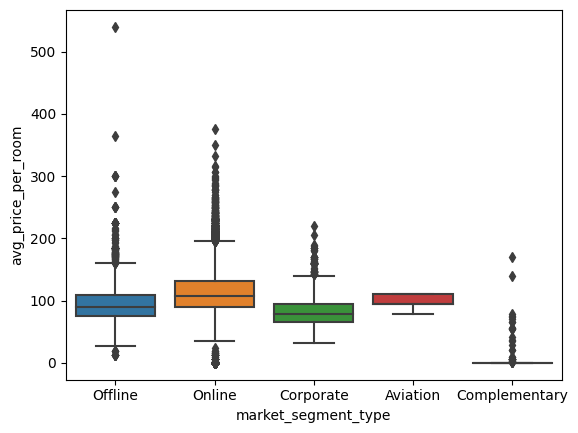

In [ ]:
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room");

In [ ]:
df_mst = pd.DataFrame(
    {
        "market_segment_type": np.sort(df["market_segment_type"].unique()),
        "minimum_price":df.groupby('market_segment_type',as_index=False)['avg_price_per_room'].min()['avg_price_per_room'],
        "maximum_price": df.groupby('market_segment_type',as_index=False)['avg_price_per_room'].max()['avg_price_per_room'],
        "median_price": df.groupby('market_segment_type',as_index=False)['avg_price_per_room'].median()['avg_price_per_room'],
        "mean_price": df.groupby('market_segment_type',as_index=False)['avg_price_per_room'].mean()['avg_price_per_room']
    }
)
df_mst

market_segment_type  minimum_price  maximum_price  median_price  mean_price
0            Aviation       79.00000      110.00000      95.00000   100.70400
1       Complementary        0.00000      170.00000       0.00000     3.14176
2           Corporate       31.00000      220.00000      79.00000    82.91174
3             Offline       12.00000      540.00000      90.00000    91.63268
4              Online        0.00000      375.50000     107.10000   112.25685

In [ ]:
df_com=df[df['market_segment_type']=='Complementary']
df_com[df_com['avg_price_per_room'] >0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
486               2               0                     2                  0   
586               2               0                     2                  2   
1275              2               1                     0                  2   
1481              2               0                     0                  2   
1523              2               0                     0                  3   
1660              0               2                     0                  1   
2407              1               0                     0                  2   
2889              2               0                     0                  5   
3069              2               0                     1                  0   
3620              1               0                     2                  1   
5984              1               0                     1                  2   
8437              2               2                     2                  0   
8954              2               0                     1                  1   
9442              1               0                     1                  1   
10213             1               0                     1                  1   
10710             1               0                     0                  2   
13223             2               0                     0                  2   
13405             2               2                     0                  1   
13958             1               0                     1                  1   
14038             2               0                     1                  1   
14216             2               0                     0                  2   
15168             1               0                     0                  2   
15222             1               0                     1                  5   
15350             1               0                     2                  0   
16551             1               0                     0                  2   
18126             1               0                     0                  2   
18609             2               0                     0                  2   
19635             2               0                     0                  1   
19734             1               0                     0                  3   
21742             1               0                     0                  1   
22963             1               0                     0                  2   
23095             1               0                     2                  3   
23718             2               1                     0                  2   
28910             1               0                     0                  1   
33121             2               0                     0                  2   
34849             1               0                     0                  1   
36165             1               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
486         Meal Plan 1                           0        Room_Type 1   
586         Meal Plan 2                           0        Room_Type 4   
1275        Meal Plan 1                           0        Room_Type 4   
1481        Meal Plan 1                           0        Room_Type 1   
1523        Meal Plan 1                           0        Room_Type 1   
1660        Meal Plan 1                           0        Room_Type 1   
2407        Meal Plan 1                           0        Room_Type 1   
2889        Meal Plan 1                           1        Room_Type 2   
3069        Meal Plan 1                           0        Room_Type 1   
3620        Meal Plan 1                           0        Room_Type 1   
5984        Meal Plan 1                           0        Room_Type 5   
8437        Meal Plan 1                           0        Room_Type 5   
8954

Average room price for Online guest booking seems to be the highest. Maximum price for the room for Offline seems to be the highest at 540 Euros.

The additional costs associated with room service or special requests likely contributed to the average room price for Complementary rooms.


####4. What percentage of bookings are canceled?

In [ ]:
df['booking_status'].value_counts(normalize=True)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

32.7% of bookings are Canceled in the dataset.


####5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
df.groupby('repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
0               Not_Canceled      23476
                Canceled          11869
1               Not_Canceled        914
                Canceled             16
Name: booking_status, dtype: int64

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


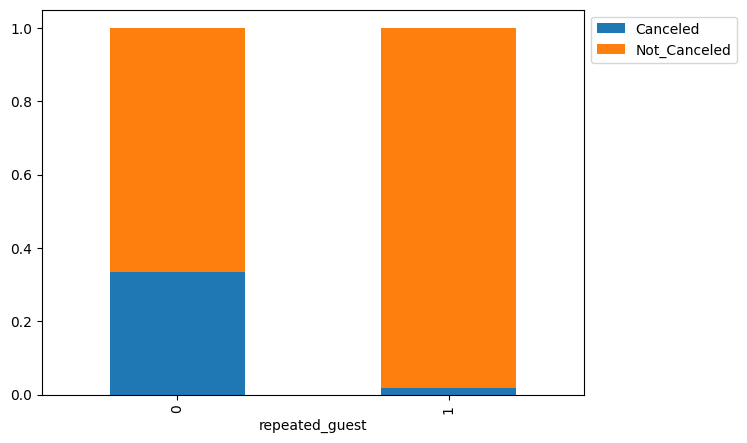

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

Approximately 1.72% of repeat guests choose to cancel their bookings


####6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


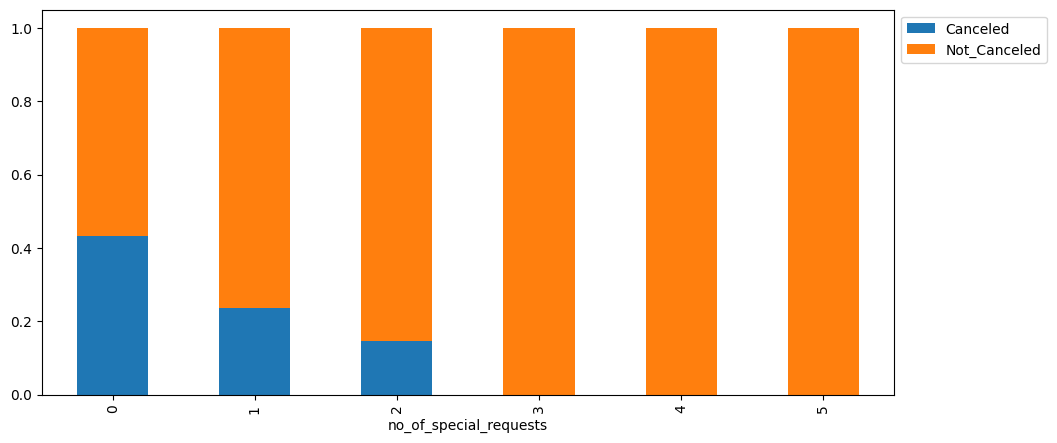

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* Guests with 0 special requests have the highest cancellation rate (43.26%).
* Guests with 1 special request also have a relatively high cancellation rate (23.78%).
* Guests with 2 special requests have a lower cancellation rate (14.60%).
* Guests with 3 or more special requests have a 0% cancellation rate, indicating that guests with more special requests tend not to cancel their bookings.


 However, It's important to note that the number of data points for guests with 3, 4, or 5 special requests is limited, making it difficult to make robust generalizations.

###Bivariate Analyis

Lets consider bivariate analysis with respect to the prediction variable that is the booking status with all the other independant variables.

####Booking Status vs number of adults/children

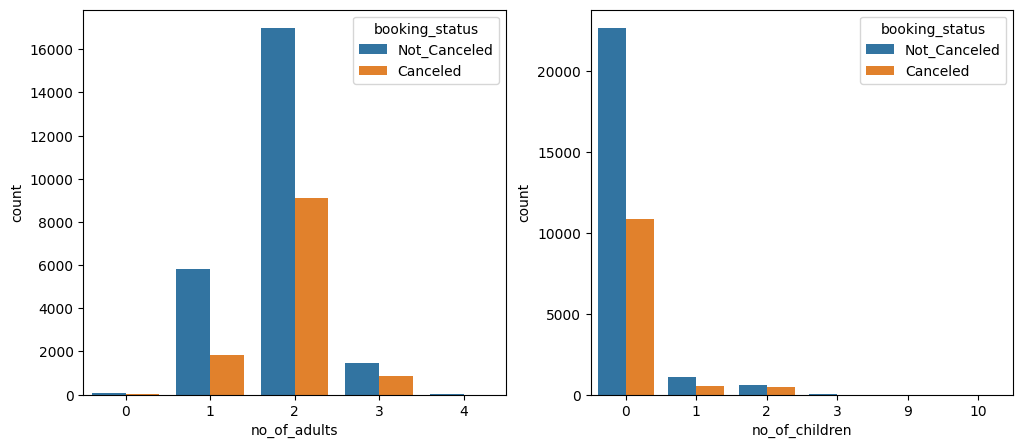

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df,x='no_of_adults',hue='booking_status')

plt.subplot(1, 2, 2)
sns.countplot(data=df,x='no_of_children',hue='booking_status')
plt.show()


In [ ]:
df_fam= df.copy()
df_fam['total_fam']=df_fam['no_of_adults']+df_fam['no_of_children']

booking_status  Canceled  Not_Canceled    All
total_fam                                    
All                11885         24390  36275
2                   8280         15662  23942
1                   1809          5743   7552
3                   1392          2459   3851
4                    398           514    912
5                      5            10     15
11                     1             0      1
10                     0             1      1
12                     0             1      1
------------------------------------------------------------------------------------------------------------------------


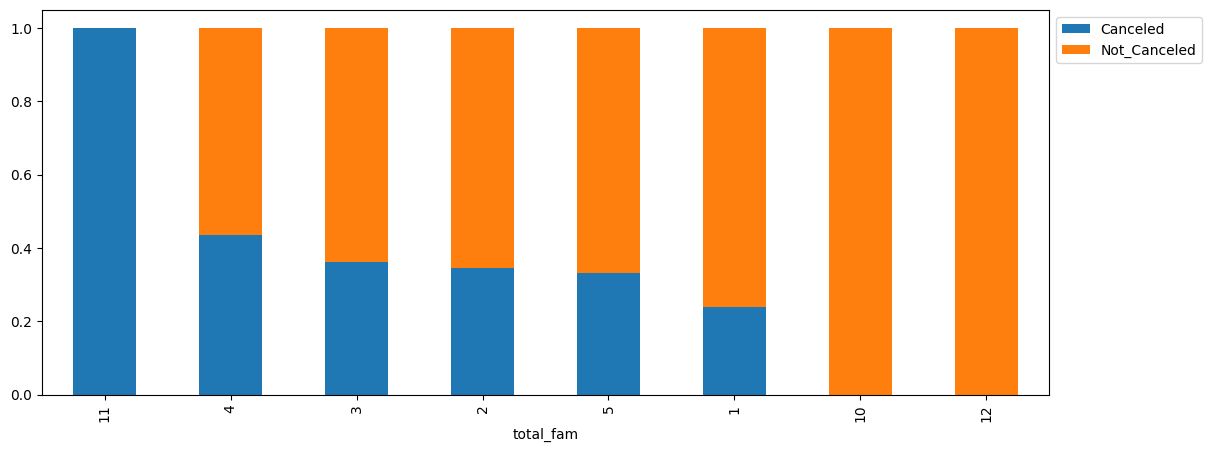

In [ ]:
stacked_barplot(df_fam,'total_fam','booking_status')
#sns.countplot(data=df_fam,x='total_fam',hue='booking_status')

The cancelation of any booking is independent of the number of adults or number of children.

####Observations on number of week nights, weekend nights, total number of days stayed

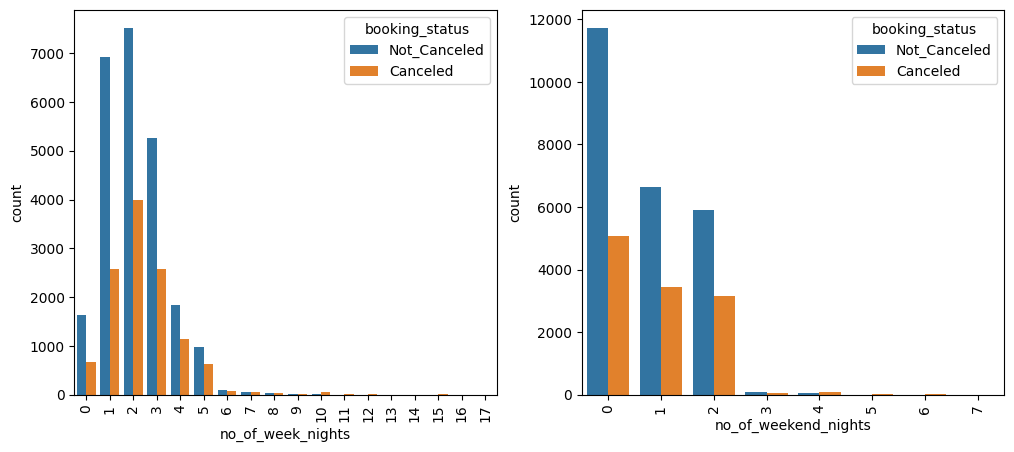

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df,x='no_of_week_nights',hue='booking_status')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=df,x='no_of_weekend_nights',hue='booking_status')
plt.xticks(rotation=90)
plt.show()

booking_status  Canceled  Not_Canceled    All
num_days_total                               
All                11885         24390  36275
3                   3588          6529  10117
2                   2899          5573   8472
4                   1941          3952   5893
1                   1466          5151   6617
5                    823          1766   2589
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
19                     5             1      6
16                     5             1      6
17                     4          

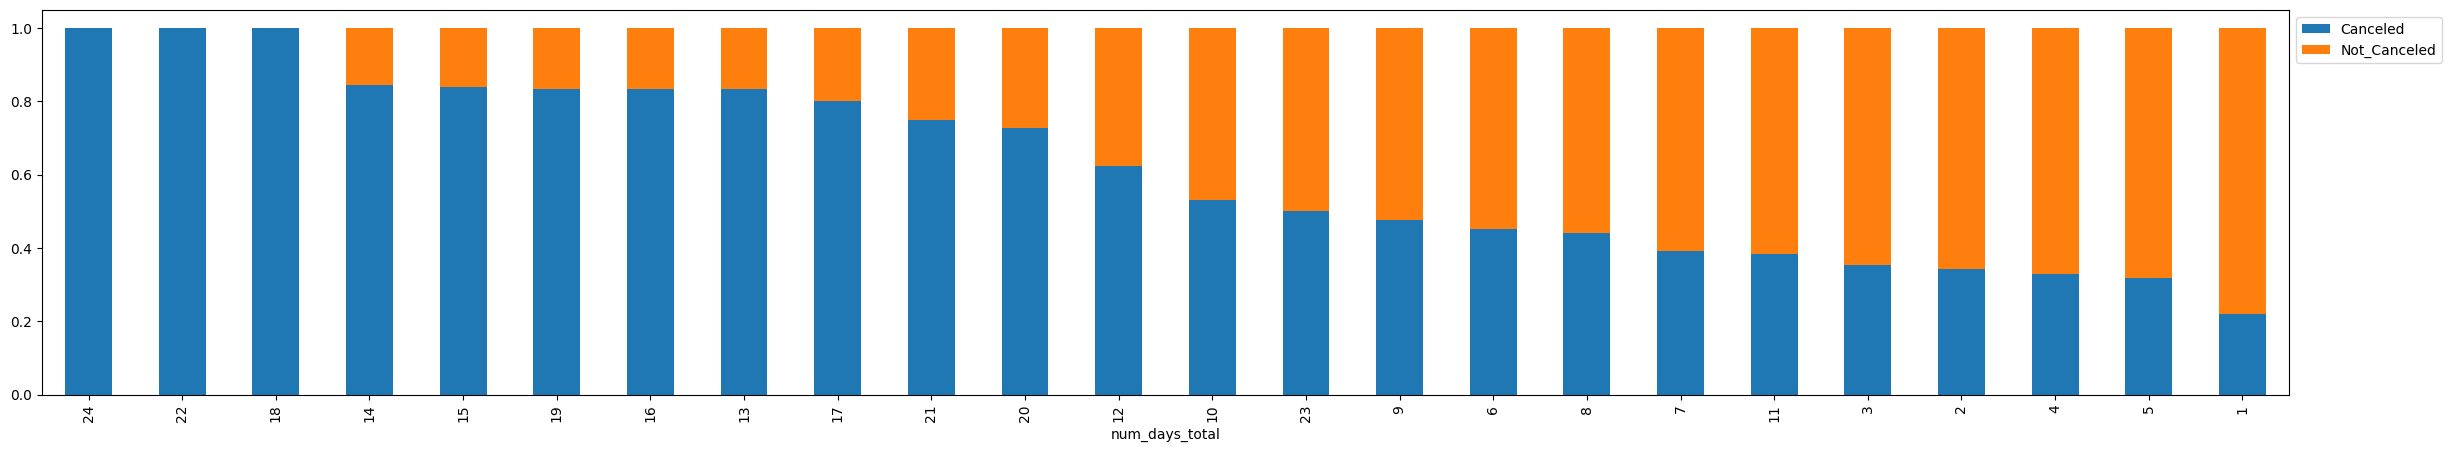

In [ ]:
stacked_barplot(df,'num_days_total','booking_status')

In [ ]:
df.groupby('num_days_total',as_index=False)['booking_status'].value_counts()

num_days_total booking_status  count
0                1   Not_Canceled   5151
1                1       Canceled   1466
2                2   Not_Canceled   5573
3                2       Canceled   2899
4                3   Not_Canceled   6529
5                3       Canceled   3588
6                4   Not_Canceled   3952
7                4       Canceled   1941
8                5   Not_Canceled   1766
9                5       Canceled    823
10               6   Not_Canceled    566
11               6       Canceled    465
12               7   Not_Canceled    590
13               7       Canceled    383
14               8   Not_Canceled    100
15               8       Canceled     79
16               9   Not_Canceled     58
17               9       Canceled     53
18              10       Canceled     58
19              10   Not_Canceled     51
20              11   Not_Canceled     24
21              11       Canceled     15
22              12       Canceled     15
23              12   Not_Canceled      9
24              13       Canceled     15
25              13   Not_Canceled      3
26              14       Canceled     27
27              14   Not_Canceled      5
28              15       Canceled     26
29              15   Not_Canceled      5
30              16       Canceled      5
31              16   Not_Canceled      1
32              17       Canceled      4
33              17   Not_Canceled      1
34              18       Canceled      3
35              19       Canceled      5
36              19   Not_Canceled      1
37              20       Canceled      8
38              20   Not_Canceled      3
39              21       Canceled      3
40              21   Not_Canceled      1
41              22       Canceled      2
42              23       Canceled      1
43              23   Not_Canceled      1
44              24       Canceled      1

Higher the number of days booked, the chances of cancelation is higher from the plots.

####Observations on Guest parking, Repeated guest

required_car_parking_space      0     1    All
booking_status                                
All                         35151  1124  36275
Not_Canceled                23380  1010  24390
Canceled                    11771   114  11885
------------------------------------------------------------------------------------------------------------------------


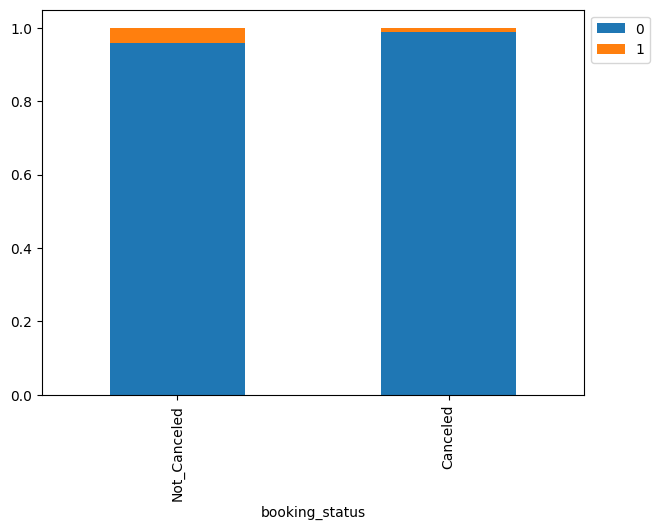

In [ ]:
stacked_barplot(df,'booking_status','required_car_parking_space')

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


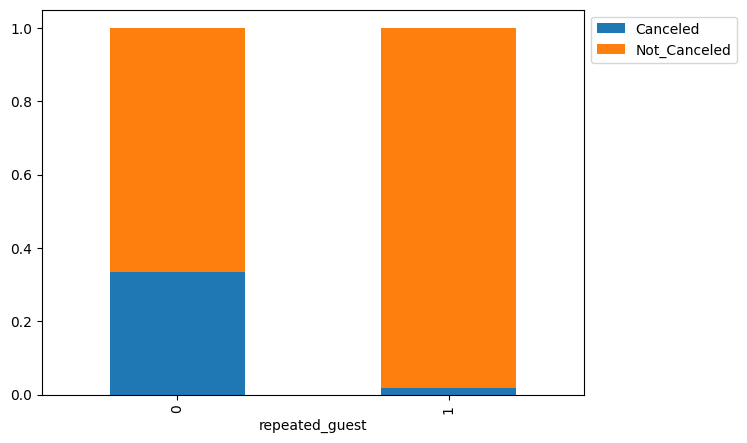

In [ ]:
stacked_barplot(df,'repeated_guest','booking_status')

* Guests who retained their bookings rarely requested car parking spaces.
* Repeated guests exhibited a high retention rate for their bookings, with very few cancellations.

####Observations on Room Type reserved with booking status

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


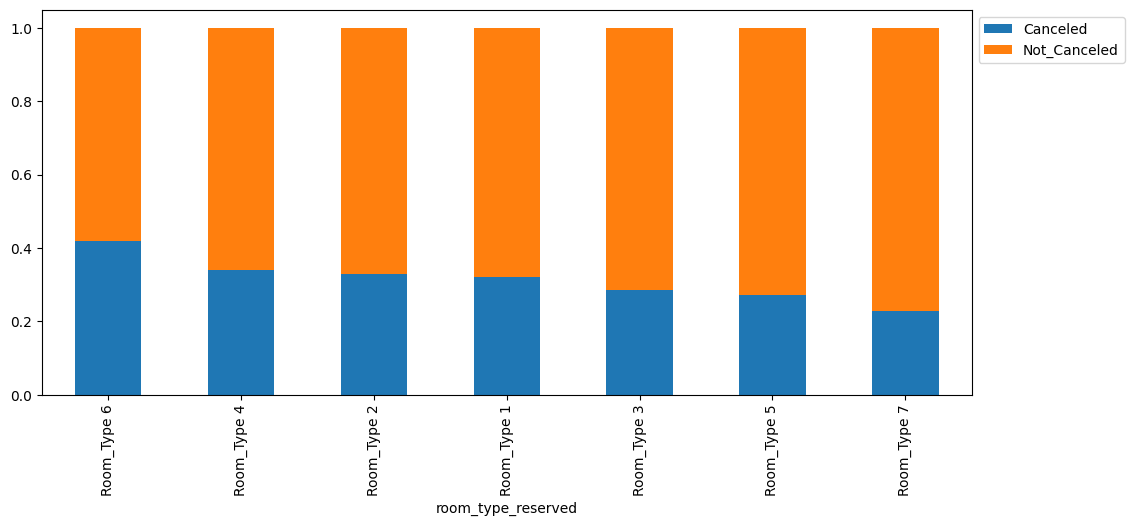

In [ ]:
stacked_barplot(df, "room_type_reserved", "booking_status")

* The highest number of cancellations is associated with bookings reserving room type 6.
* Cancellation rates per room type do not significantly differ from one another in general.

####Observations on Type of Meal plan and booking status

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


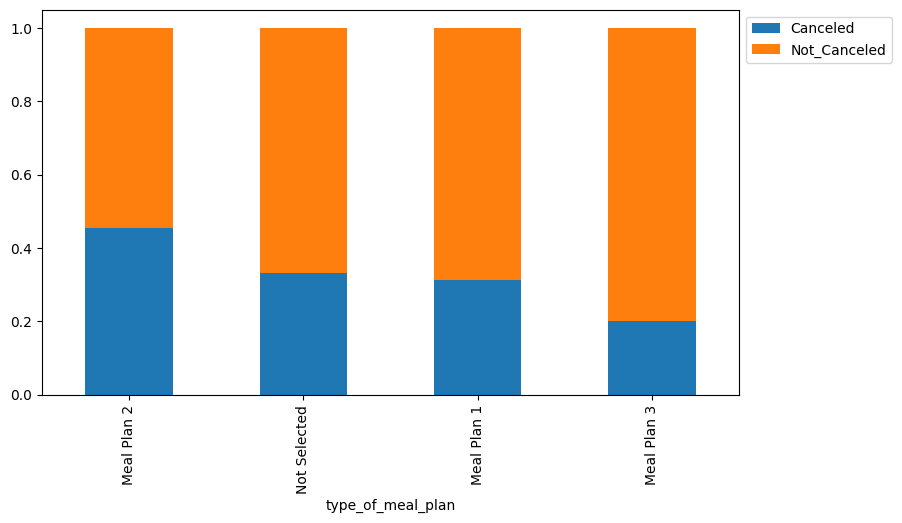

In [ ]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

Bookings with meal plan 3 show the least cancellations

####Observations on Market Segment type and booking status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


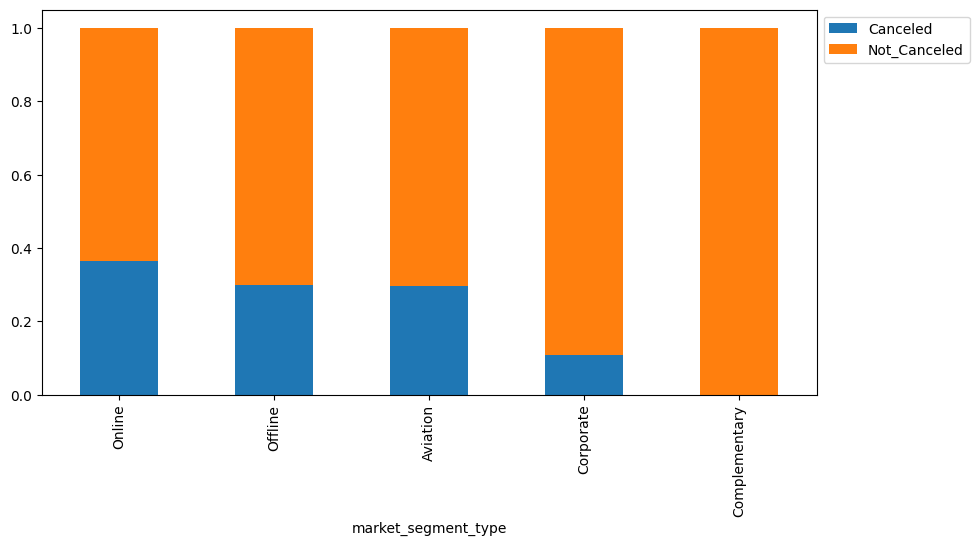

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

* The "Complementary" market segment type exhibits a zero cancellation rate, indicating no cancellations.
* About 10% of bookings from the "Corporate" market segment type result in cancellations.
* The "Aviation" and "Offline" market segment types both have a similar cancellation rate, which is around 30%.
* Bookings made through the "Online" market segment type experience the highest cancellation rate, with roughly 35% of these bookings being canceled.

####Observations on Arrival month and booking status

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


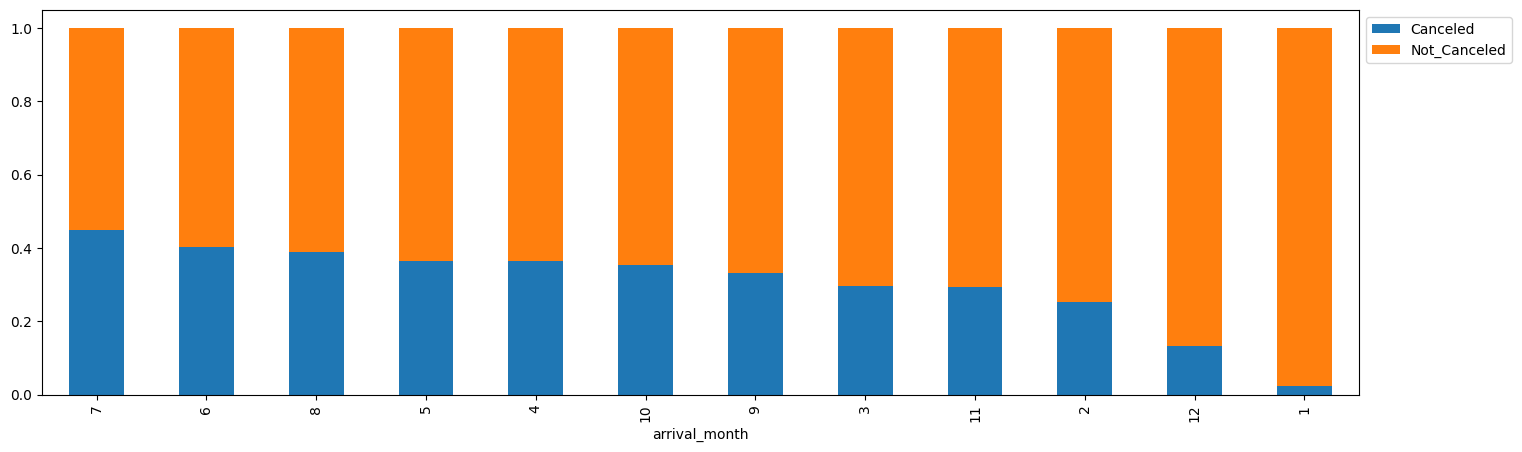

In [ ]:
stacked_barplot(df,'arrival_month','booking_status')

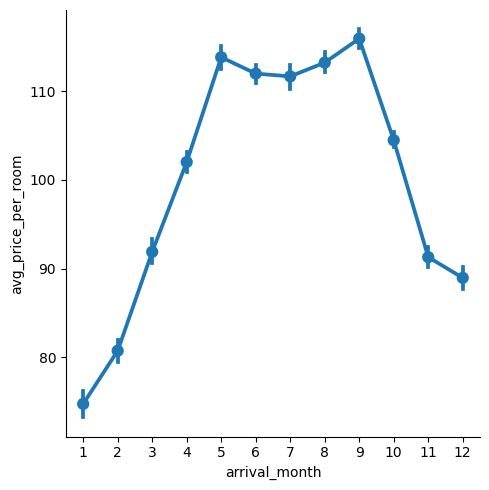

In [ ]:
sns.catplot(data=df, x='arrival_month',y='avg_price_per_room',kind='point');

July has the maximum number of cancelations followed by June. Least cancelations happened in January month.

May to September the average price of a room is higher compared to other months maybe due to Summer vacation time.

####Observations on Average Price with booking status

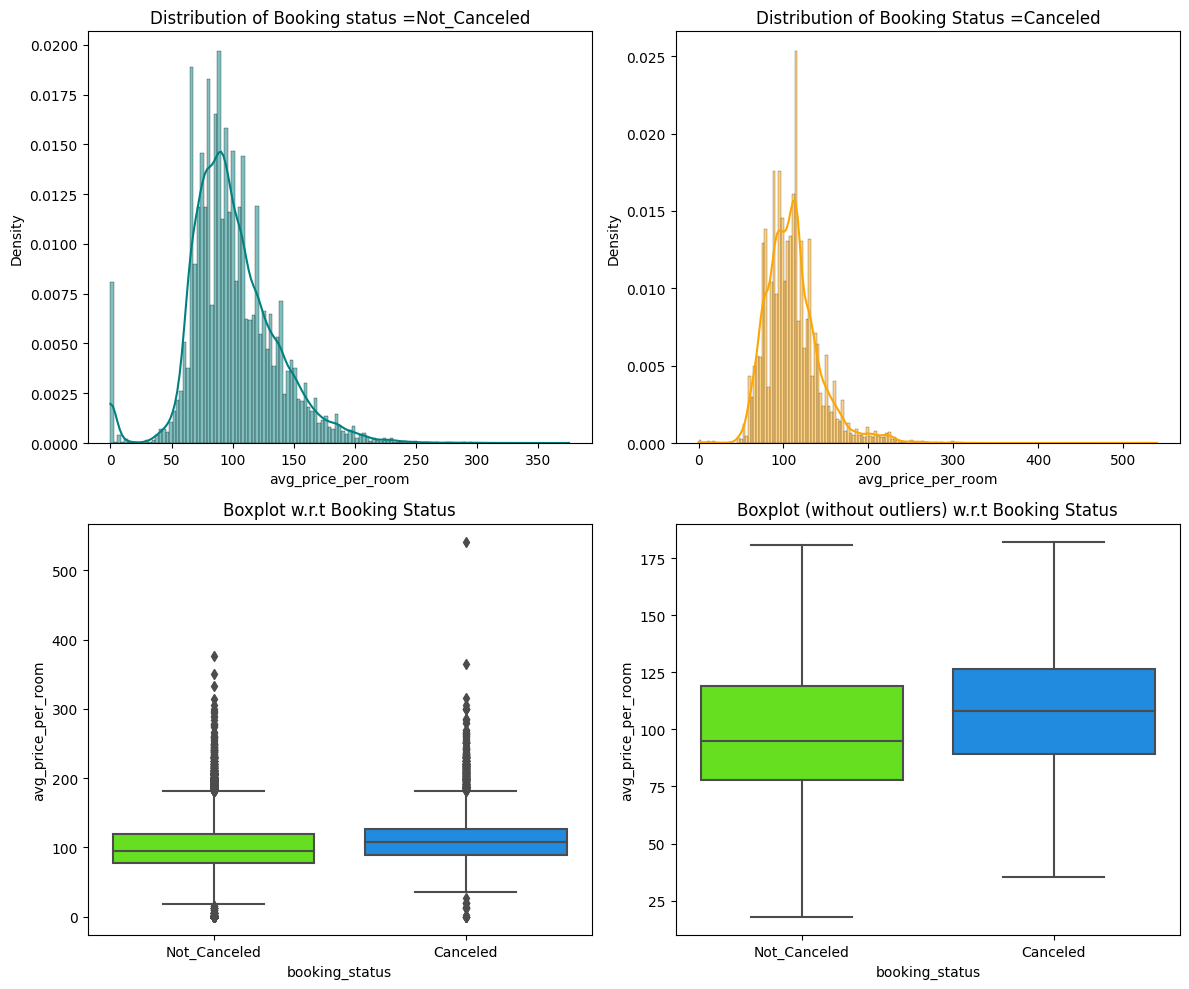

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

The average room price for canceled bookings is approximately 110 euros, whereas it's around 90 euros for bookings that were not canceled.

####Observations on Lead time with booking status

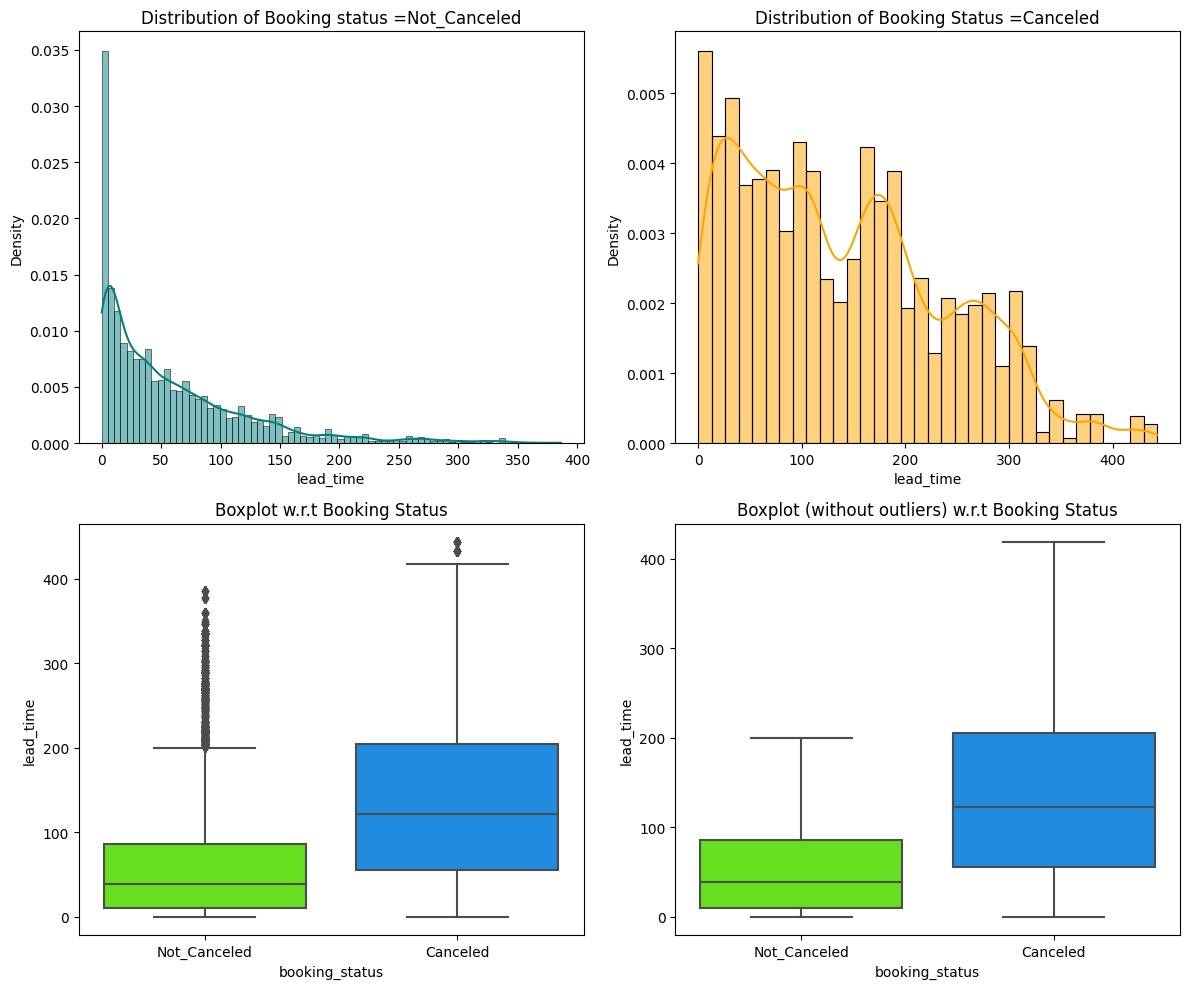

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

75% of the bookings have a lead time less than 100 days that are not canceled where as the average lead time for canceled bookings is around 120 days.

#### Corelations of all variables

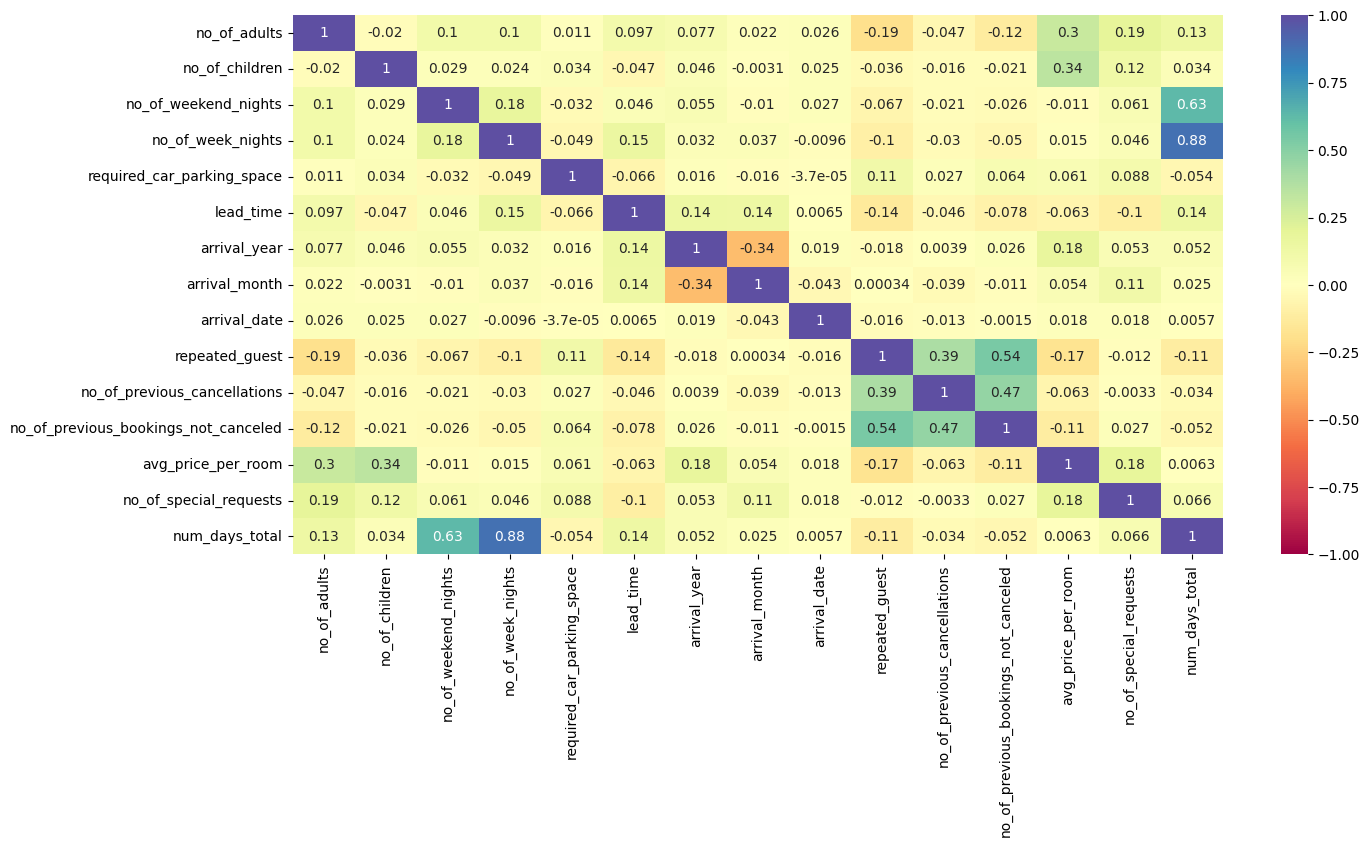

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Number of previous Cancelations and repeat guest have a corelation of 0.39
* Number if previous bookings that are not canceled have positive corelation with repeat guest(0.54) and number of previous cancelation (0.47).
* Average price per room have a positive corelation with number of people stay ie the number of adults(0.3) and number of children(0.34)

####Observations on Average room prive with respect to booking status and market segment type.

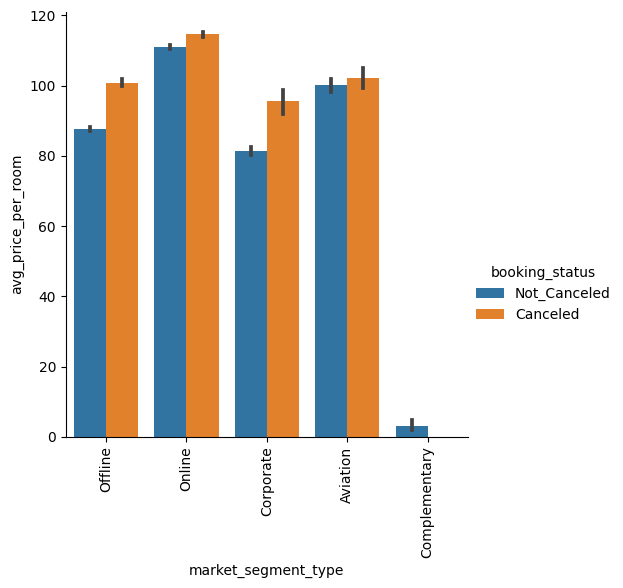

In [ ]:
sns.catplot(data=df, y="avg_price_per_room", x="market_segment_type", hue="booking_status", kind="bar")
plt.xticks(rotation=90);

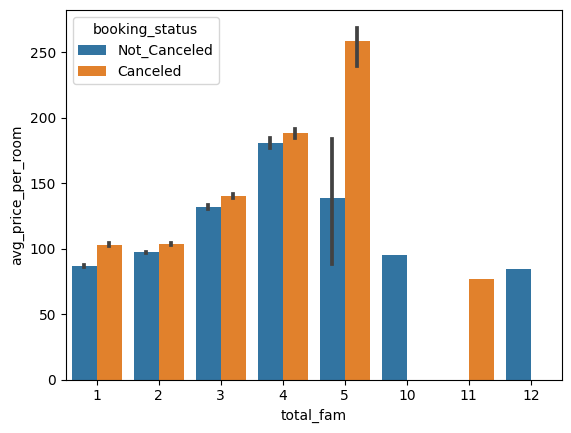

In [ ]:
#Understanding the number of people , avg price and booking status
sns.barplot(data=df_fam,x='total_fam', y="avg_price_per_room", hue="booking_status");

From the visualizations provided above, it's evident that there is a positive correlation between the number of occupants per room and the average room price. Typically, families and larger groups prefer to travel together and reserve a single room in a hotel.

Moreover, the likelihood of booking cancellations tends to rise with an increasing number of occupants per booking and higher average room prices.

## Data Preprocessing


### Outlier Detection

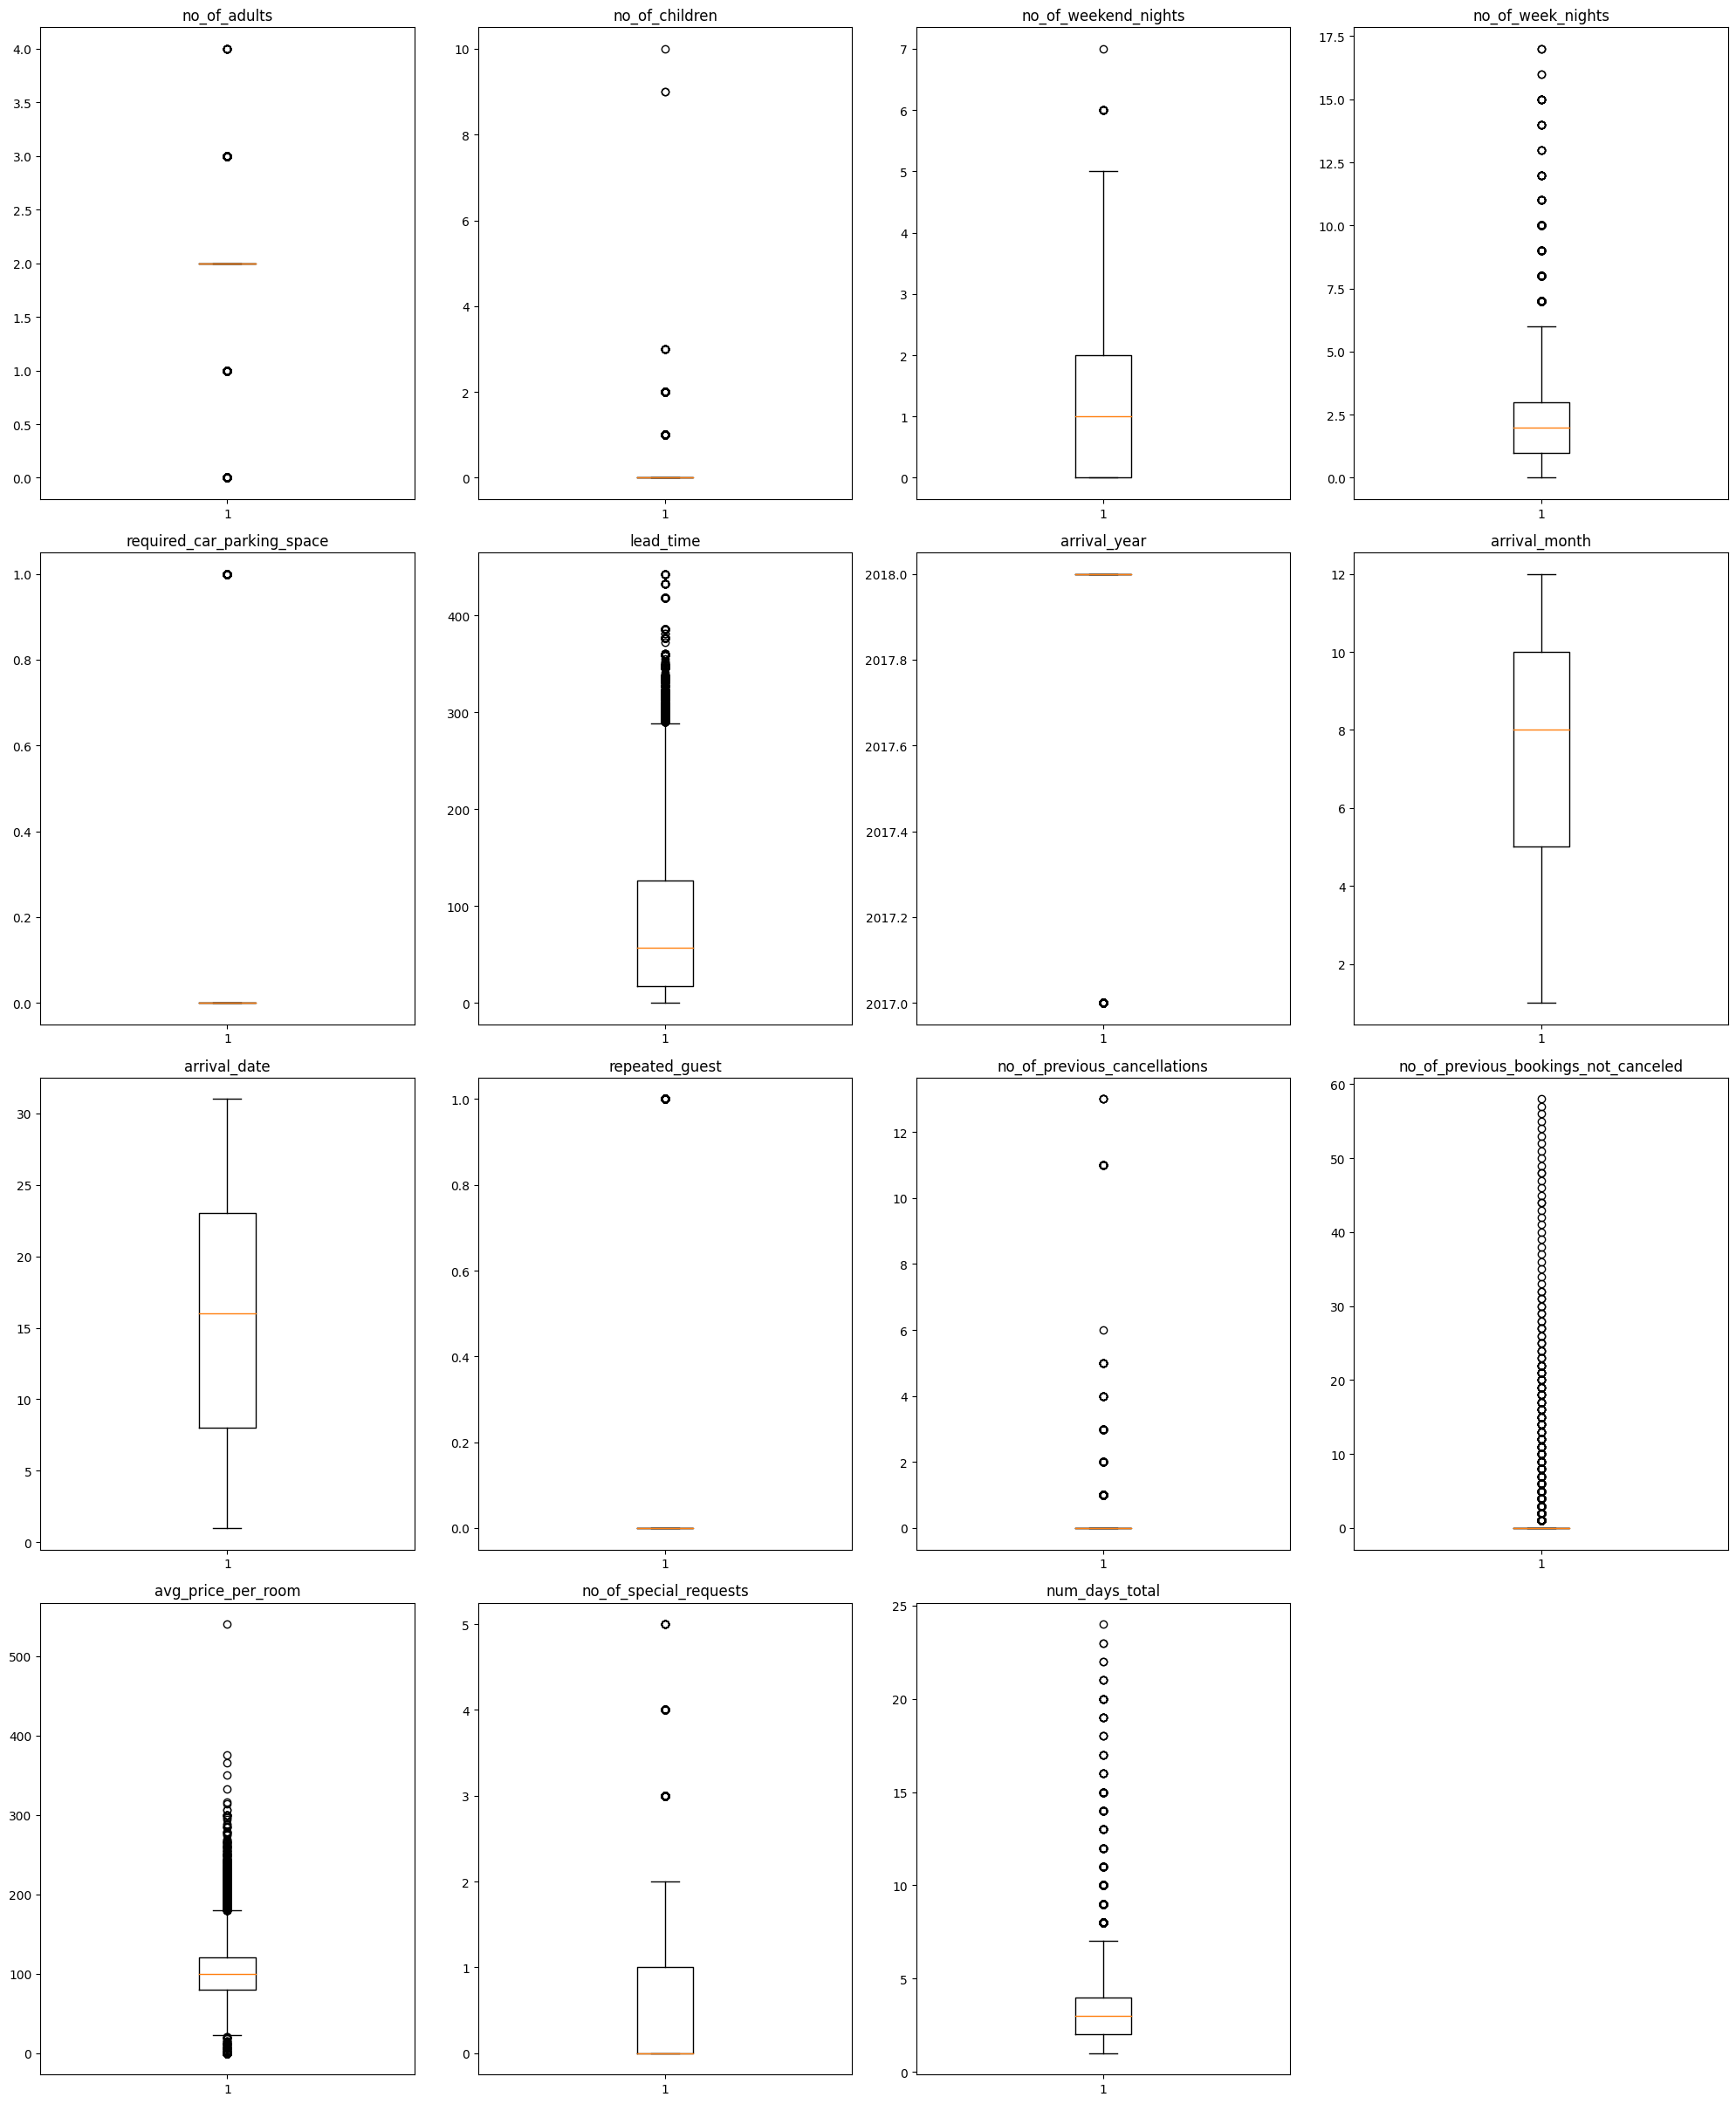

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
 #functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
# list of columns to treat for outliers
treat_out_cols = ["lead_time", "avg_price_per_room", "no_of_week_nights", "no_of_weekend_nights"]

In [ ]:
# create a new data frame after treating outliers in the colums
df1 = treat_outliers_all(df, treat_out_cols)

Re-check columns to see if outliers were treated

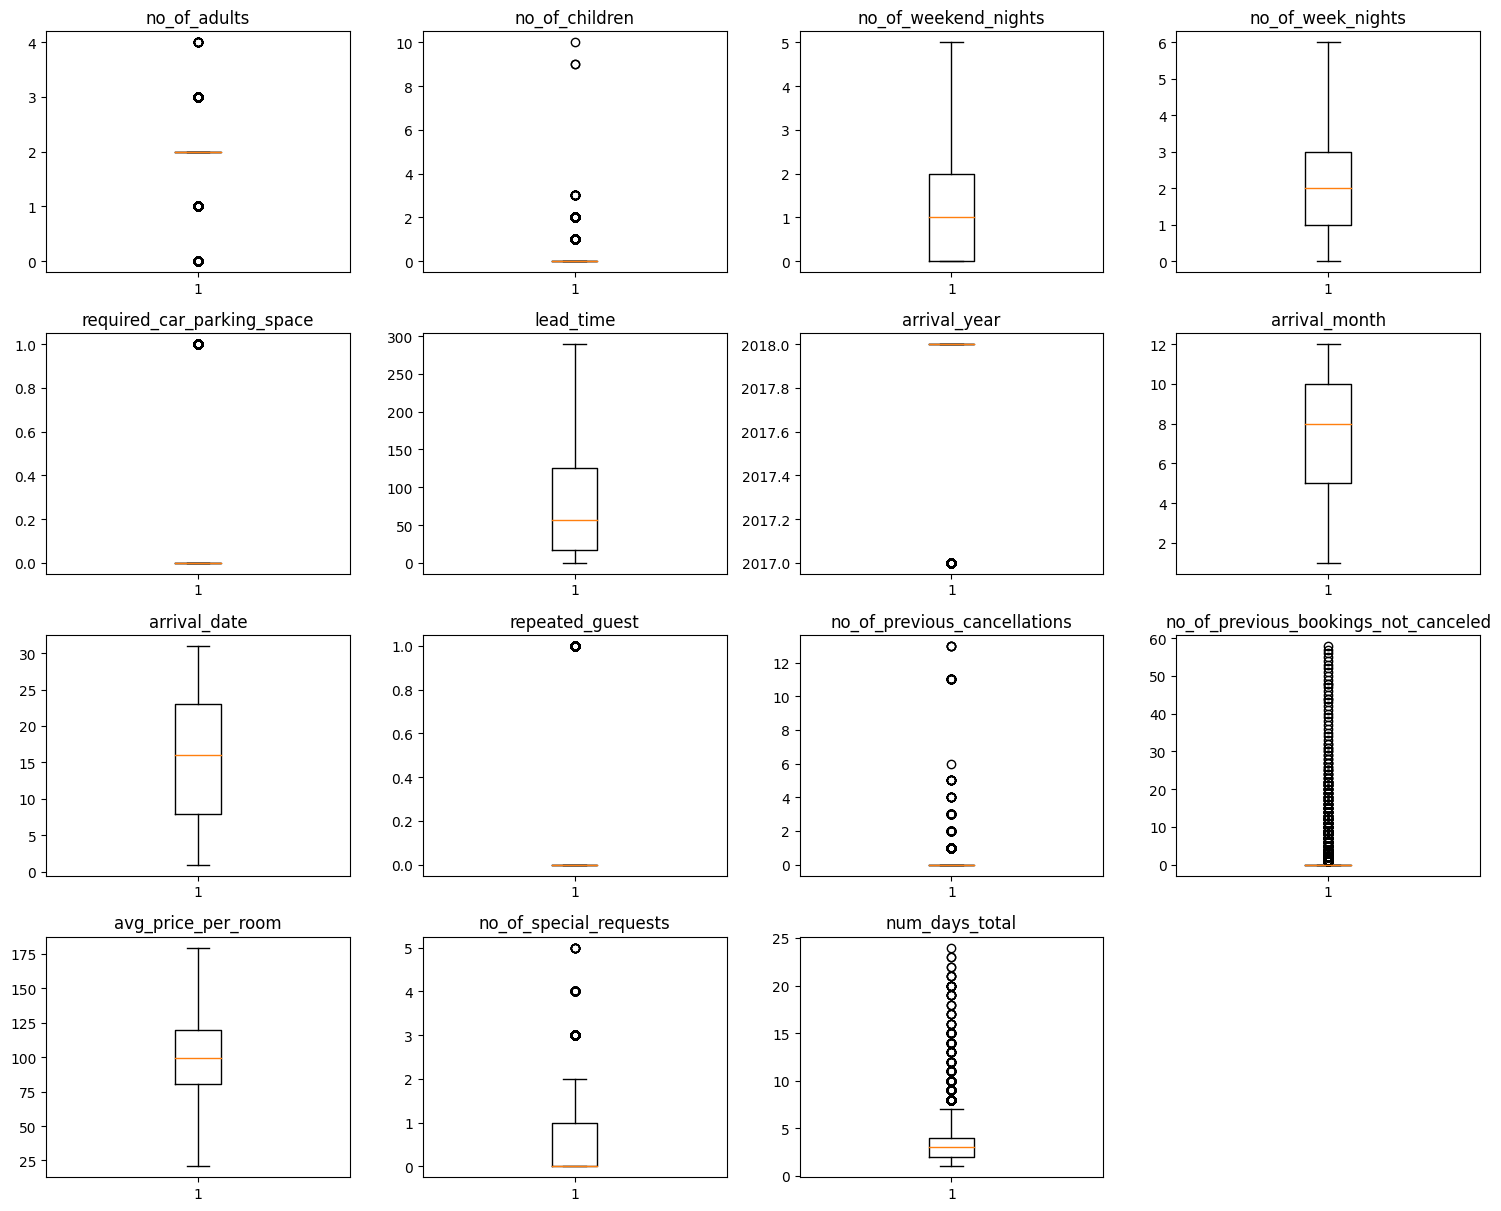

In [ ]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

###Preparing data for modelling

In [ ]:
print(df1['type_of_meal_plan'].unique())
print(df1['required_car_parking_space'].unique())
print(df1['room_type_reserved'].unique())
print(df1['market_segment_type'].unique())
print(df1['repeated_guest'].unique())
print(df1['booking_status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
[0 1]
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
[0 1]
['Not_Canceled' 'Canceled']


In [ ]:
data=df1.copy()

In [ ]:
data['required_car_parking_space'] = data['required_car_parking_space'].replace({1: "yes", 0: "no"})
data['repeated_guest'] = data['repeated_guest'].replace({1: "yes", 0: "no"})
data['booking_status'] = data['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace({'Meal Plan 1': 1, 'Meal Plan 2': 2,'Meal Plan 3': 3,'Not Selected':0})

In [ ]:
print(data['type_of_meal_plan'].unique())
print(data['required_car_parking_space'].unique())
print(data['repeated_guest'].unique())
print(data['booking_status'].unique())

[1 0 2 3]
['no' 'yes']
['no' 'yes']
[0 1]


In [ ]:
for col in ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type','repeated_guest','booking_status']:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  float64 
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [ ]:
#arrival year is a temporal value so dropping it.
data = data.drop('arrival_year',axis=1)
data =data.drop('num_days_total',axis=1)

In [ ]:
data_logit = data.copy()

## EDA


In [ ]:
data_logit.describe(include="all").T

count  unique          top  \
no_of_adults                         36275.00000     NaN          NaN   
no_of_children                       36275.00000     NaN          NaN   
no_of_weekend_nights                 36275.00000     NaN          NaN   
no_of_week_nights                    36275.00000     NaN          NaN   
type_of_meal_plan                    36275.00000 4.00000      1.00000   
required_car_parking_space                 36275       2           no   
room_type_reserved                         36275       7  Room_Type 1   
lead_time                            36275.00000     NaN          NaN   
arrival_month                        36275.00000     NaN          NaN   
arrival_date                         36275.00000     NaN          NaN   
market_segment_type                        36275       5       Online   
repeated_guest                             36275       2           no   
no_of_previous_cancellations         36275.00000     NaN          NaN   
no_of_previous_bookings_not_canceled 36275.00000     NaN          NaN   
avg_price_per_room                   36275.00000     NaN          NaN   
no_of_special_requests               36275.00000     NaN          NaN   
booking_status                       36275.00000 2.00000      0.00000   

                                            freq      mean      std      min  \
no_of_adults                                 NaN   1.84496  0.51871  0.00000   
no_of_children                               NaN   0.10528  0.40265  0.00000   
no_of_weekend_nights                         NaN   0.81191  0.86670  0.00000   
no_of_week_nights                            NaN   2.18178  1.28687  0.00000   
type_of_meal_plan                    27835.00000       NaN      NaN      NaN   
required_car_parking_space                 35151       NaN      NaN      NaN   
room_type_reserved                         28130       NaN      NaN      NaN   
lead_time                                    NaN  83.76175 81.65691  0.00000   
arrival_month                                NaN   7.42365  3.06989  1.00000   
arrival_date                                 NaN  15.59700  8.74045  1.00000   
market_segment_type                        23214       NaN      NaN      NaN   
repeated_guest                             35345       NaN      NaN      NaN   
no_of_previous_cancellations                 NaN   0.02335  0.36833  0.00000   
no_of_previous_bookings_not_canceled         NaN   0.15341  1.75417  0.00000   
avg_price_per_room                           NaN 102.97018 31.68121 20.75000   
no_of_special_requests                       NaN   0.61966  0.78624  0.00000   
booking_status                       24390.00000       NaN      NaN      NaN   

                                          25%      50%       75%       max  
no_of_adults                          2.00000  2.00000   2.00000   4.00000  
no_of_children                        0.00000  0.00000   0.00000  10.00000  
no_of_weekend_nights                  0.00000  1.00000   2.00000   5.00000  
no_of_week_nights                     1.00000  2.00000   3.00000   6.00000  
type_of_meal_plan                         NaN      NaN       NaN       NaN  
required_car_parking_space                NaN      NaN       NaN       NaN  
room_type_reserved                        NaN      NaN       NaN       NaN  
lead_time                            17.00000 57.00000 126.00000 289.50000  
arrival_month                         5.00000  8.00000  10.00000  12.00000  
arrival_date                          8.00000 16.00000  23.00000  31.00000  
market_segment_type                       NaN      NaN       NaN       NaN  
repeated_guest                            NaN      NaN       NaN       NaN  
no_of_previous_cancellations          0.00000  0.00000   0.00000  13.00000  
no_of_previous_bookings_not_canceled  0.00000  0.00000   0.00000  58.00000  
avg_price_per_room                   80.30000 99.45000 120.00000 179.55000  
no_of_special_requests                0.00000  0.00000 

In [ ]:
data_logit.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
data_logit.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan required_car_parking_space room_type_reserved  lead_time  \
0                 1                         no        Room_Type 1  224.00000   
1                 0                         no        Room_Type 1    5.00000   
2                 1                         no        Room_Type 1    1.00000   
3                 1                         no        Room_Type 1  211.00000   
4                 0                         no        Room_Type 1   48.00000   

   arrival_month  arrival_date market_segment_type repeated_guest  \
0             10             2             Offline             no   
1             11             6              Online             no   
2              2            28              Online             no   
3              5            20              Online             no   
4              4            11              Online             no   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests booking_status  
0            65.00000                       0              0  
1           106.68000                       1              0  
2            60.00000                       0              1  
3           100.00000                       0              1  
4            94.50000                       0              1

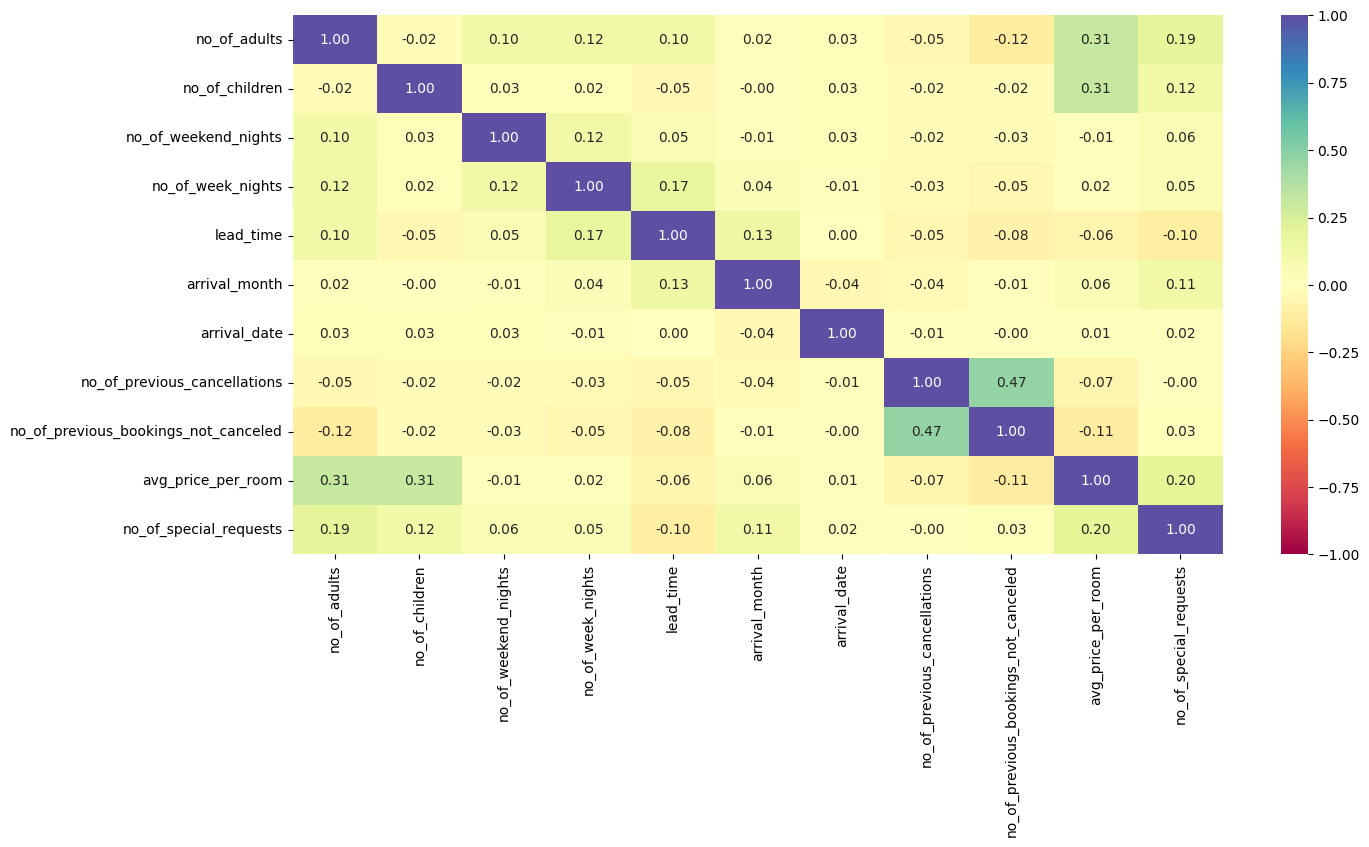

In [ ]:
cols_list = data_logit.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    data_logit[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Building Logit Model

The goal is to build a model with high accuracy and balanced precision and recall to effectively predict booking cancellations and minimize false predictions.

In [ ]:
# specifying the independent  and dependent variables
X = data_logit.drop(["booking_status"], axis=1)
Y = data_logit["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.


Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.3277
Time:                        23:59:54   Log-Likelihood:                -10819.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.1237      0.265     -8.023      0.000      -2.643      -1.605
no_of_adults                             0.0973      

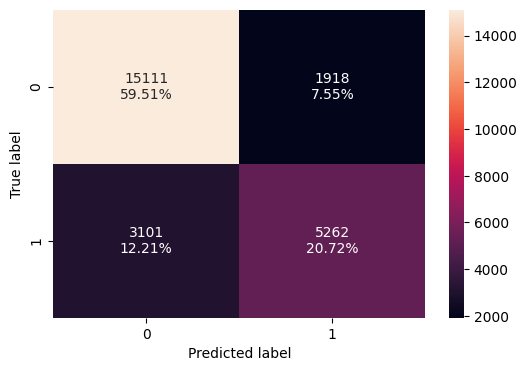

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80234 0.62920    0.73287 0.67709

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  335.88803
no_of_adults                             1.35107
no_of_children                           1.97432
no_of_weekend_nights                     1.05587
no_of_week_nights                        1.09595
lead_time                                1.24747
arrival_month                            1.05361
arrival_date                             1.00656
no_of_previous_cancellations             1.39460
no_of_previous_bookings_not_canceled     1.64739
avg_price_per_room                       1.86127
no_of_special_requests                   1.24641
type_of_meal_plan_1                      1.84189
type_of_meal_plan_2                      1.98330
type_of_meal_plan_3                      1.02731
required_car_parking_space_yes           1.03970
room_type_reserved_Room_Type 2           1.10183
room_type_reserved_Room_Type 3           1.00324
room_type_reserved_Room_Type 4           1.37060
room_type_reserved_Room_Type 5    

In [ ]:
logit2 = sm.Logit(y_train, X_train.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80234 0.62920    0.73287 0.67709

 No significant change in the model performance.

In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.3277
Time:                        23:59:58   Log-Likelihood:                -10819.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.1237      0.265     -8.023      0.000      -2.643      -1.605
no_of_adults                             0.0973      

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'lead_time', 'arrival_month', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'required_car_parking_space_yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_yes']


In [ ]:
X_train3 = X_train[selected_features]

In [ ]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3266
Time:                        00:00:00   Log-Likelihood:                -10837.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.6854      0.108    -24.879      0.000      -2.897      -2.474
no_of_adults                       0.0909      0.037      2.439      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train3* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.06819       1.09517         1.18548               1.12416   
Change_odd% -93.18071       9.51715        18.54762              12.41598   

             lead_time  arrival_month  no_of_previous_cancellations  \
Odds           1.01720        0.94050                       1.23975   
Change_odd%    1.71991       -5.94960                      23.97496   

             avg_price_per_room  no_of_special_requests  type_of_meal_plan_1  \
Odds                    1.02195                 0.23264              0.69420   
Change_odd%             2.19532               -76.73573            -30.57955   

             type_of_meal_plan_2  required_car_parking_space_yes  \
Odds                     0.77042                         0.19311   
Change_odd%            -22.95755                       -80.68884   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.69154                         0.77190   
Change_odd%                       -30.84644                       -22.81030   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.50284                         0.45807   
Change_odd%                       -49.71628                       -54.19342   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                0.46634                        0.45269   
Change_odd%                       -53.36578                      -54.73128   

             market_segment_type_Offline  repeated_guest_yes  
Odds                             0.16205             0.07761  
Change_odd%                    -83.79535           -92.23911

### Checking performance of the new model

**Training set performance**

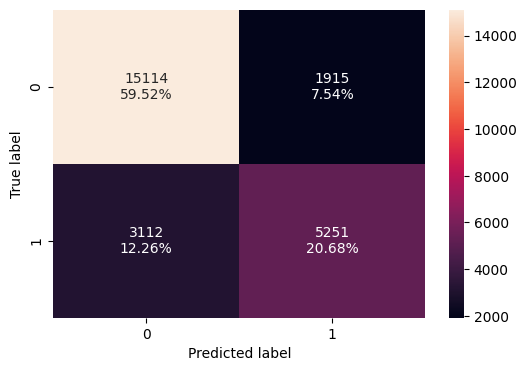

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80202 0.62788    0.73277 0.67628

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
X_test3 = X_test[list(X_train3.columns)]

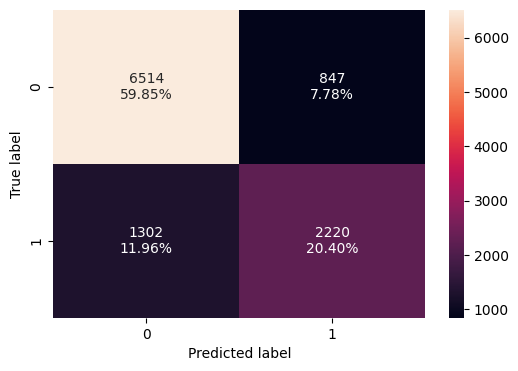

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80254 0.63032    0.72383 0.67385

- The model is giving a f1_score of ~0.677 and ~0.673 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

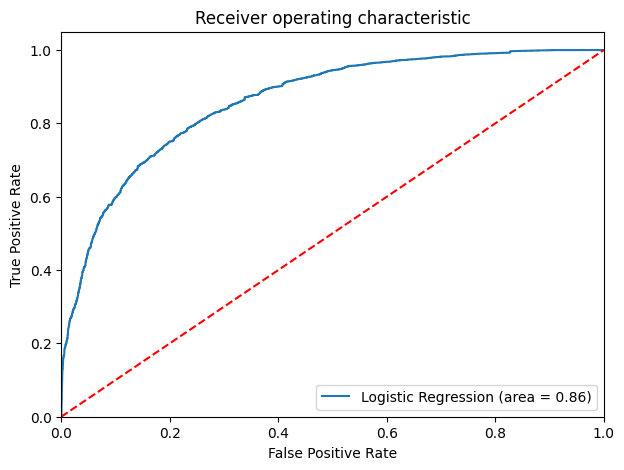

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3148618190490823


**Checking model performance on training set**

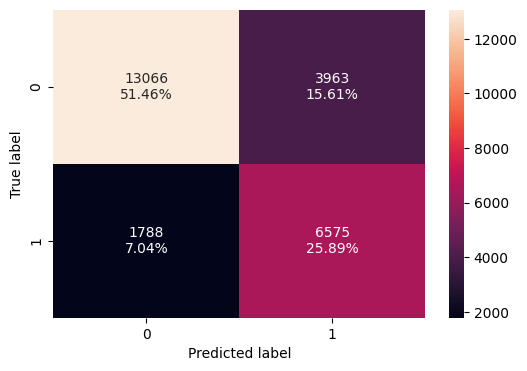

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.77351 0.78620    0.62393 0.69573

* Recall of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

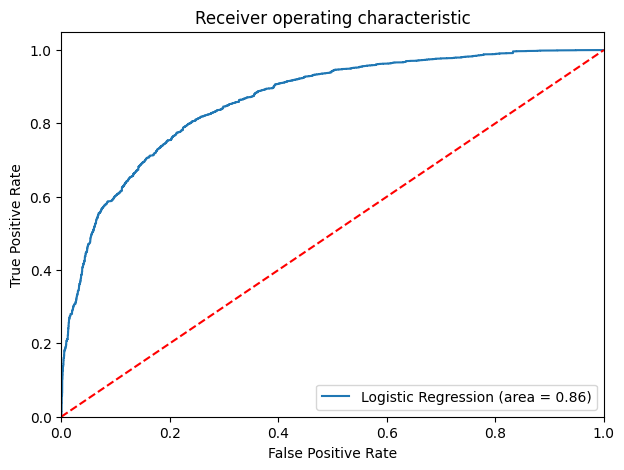

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

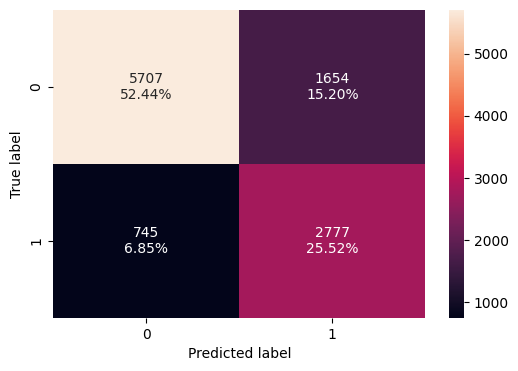

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77956 0.78847    0.62672 0.69835

### Precision-Recall Curve

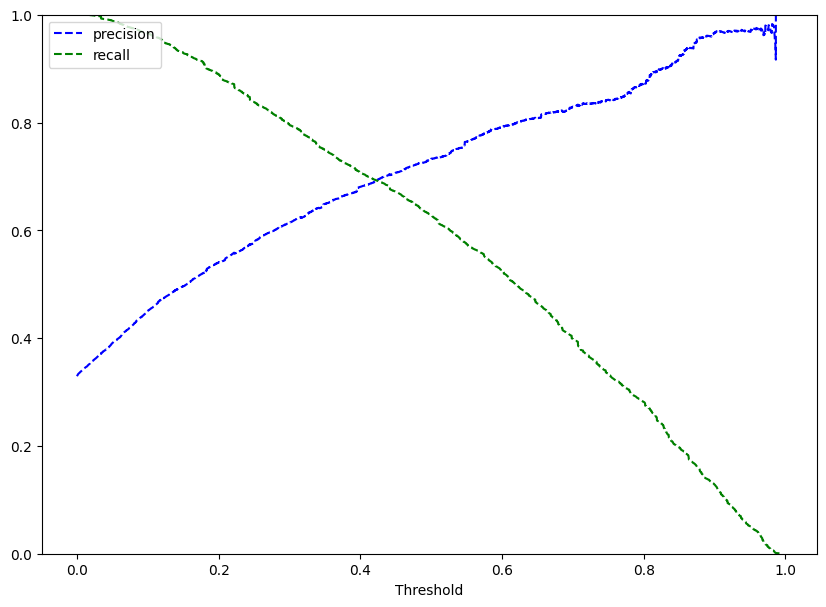

In [ ]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

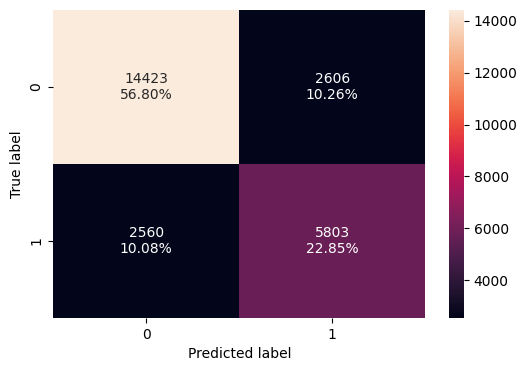

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79655 0.69389    0.69009 0.69199

* Model is performing well on training set.
* Except recall, all metrics have improved with threshold 0.42

**Checking model performance on test set**

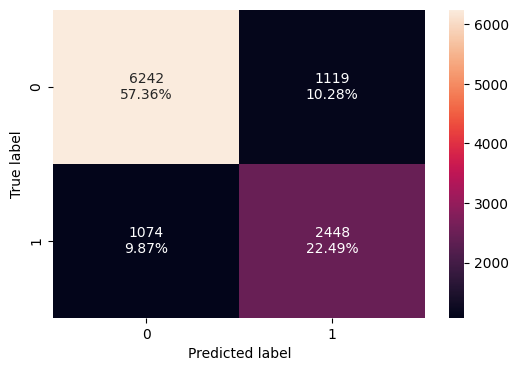

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79849 0.69506    0.68629 0.69065

## Model performance evaluation and Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.315 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80202   
Recall                                         0.62788   
Precision                                      0.73277   
F1                                             0.67628   

           Logistic Regression-0.315 Threshold  \
Accuracy                               0.77351   
Recall                                 0.78620   
Precision                              0.62393   
F1                                     0.69573   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79655  
Recall                                0.69389  
Precision                             0.69009  
F1                                    0.69199

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.315 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80254   
Recall                                         0.63032   
Precision                                      0.72383   
F1                                             0.67385   

           Logistic Regression-0.315 Threshold  \
Accuracy                               0.77956   
Recall                                 0.78847   
Precision                              0.62672   
F1                                     0.69835   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79849  
Recall                                0.69506  
Precision                             0.68629  
F1                                    0.69065

Considering the given metrics, here are some recommendations:

* If the highest priority is minimizing false negatives (i.e., correctly identifying as many cancellations as possible), the Logistic Regression model with Threshold 0.315 performs the best in terms of recall.

* If a balance between precision and recall is important, the Logistic Regression model with Default Threshold (0.5) provides a reasonable F1 Score and better precision compared to the other models.

* If a slightly higher accuracy is desired while maintaining good recall, the Logistic Regression model with Threshold 0.42 can be considered.

Ultimately, the choice depends on the specific business objectives and the acceptable trade-off between precision and recall. It's important to also consider the cost associated with false positives and false negatives in the context of INN Hotels Group's operations and profitability.

Considering the importance of both cases and the hotel's objectives, where both minimizing false positives and false negatives are critical, the F1 Score is an appropriate metric to assess the model's performance. The F1 Score balances precision and recall and is well-suited for scenarios where both types of errors have significant consequences.

Looking at the F1 Scores of the three models:

>Logistic Regression (Default Threshold 0.5)

>Test F1 Score: 0.67385

>Logistic Regression (Threshold 0.315)

>Test F1 Score: 0.69835

>Logistic Regression (Threshold 0.42)

>Test F1 Score: 0.69065

The model with a threshold of 0.315 has the highest F1 Score on the test data, making it the most suitable choice for the hotel's objectives. This model provides the best balance between precision and recall, which aligns with the hotel's need to minimize both types of prediction errors. Therefore, the Logistic Regression model with a threshold of 0.315 is the better choice.






## Building a Decision Tree model

In [ ]:
# specifying the independent  and dependent variables
X_CART = data_logit.drop(["booking_status"], axis=1)
Y_CART = data_logit["booking_status"]

# adding a constant to the independent variables
X_CART = sm.add_constant(X_CART)

# creating dummy variables
X_CART = pd.get_dummies(X_CART, drop_first=True)

# splitting data in train and test sets
X_train_CART, X_test_CART, y_train_CART, y_test_CART = train_test_split(
    X_CART, Y_CART, test_size=0.30, random_state=1
)


In [ ]:
print("Shape of Training set : ", X_train_CART.shape)
print("Shape of test set : ", X_test_CART.shape)
print("Percentage of classes in training set:")
print(y_train_CART.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test_CART.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


### Model Evaluation

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

### Decision Tree (default)

In [ ]:
model0 = DecisionTreeClassifier(criterion = 'gini',random_state=1)
model0.fit(X_train_CART, y_train_CART)

DecisionTreeClassifier(random_state=1)

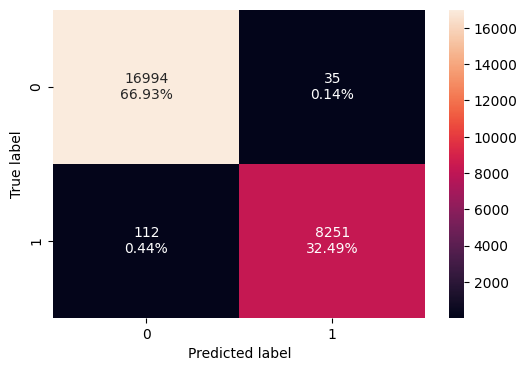

In [ ]:
confusion_matrix_sklearn(model0, X_train_CART, y_train_CART)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train_CART, y_train_CART
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

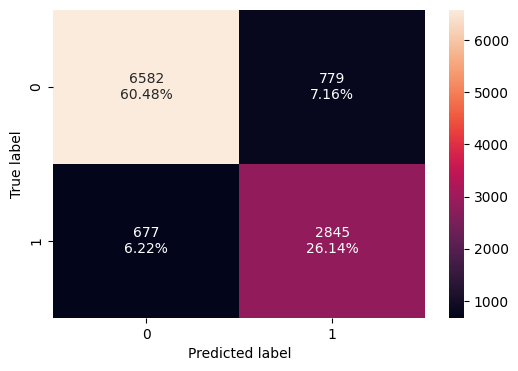

In [ ]:
confusion_matrix_sklearn(model0, X_test_CART, y_test_CART)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test_CART, y_test_CART
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.86621 0.80778    0.78504 0.79625

Observations: Accuracy is approximately 99% on the training set and ~87% on the test set

Checking for important features before Pruning.

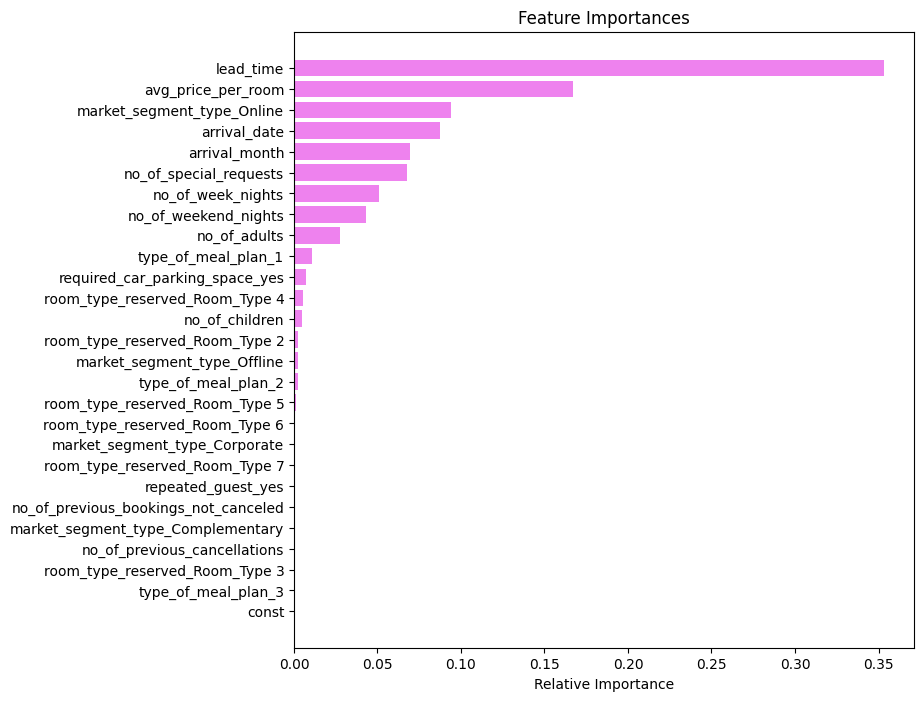

In [ ]:
feature_names = list(X_train_CART.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
feature_names = list(X_CART.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_1', 'type_of_meal_plan_2', 'type_of_meal_plan_3', 'required_car_parking_space_yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'repeated_guest_yes']


In [ ]:
print(tree.export_text(model0,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest_yes <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest_yes >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_R

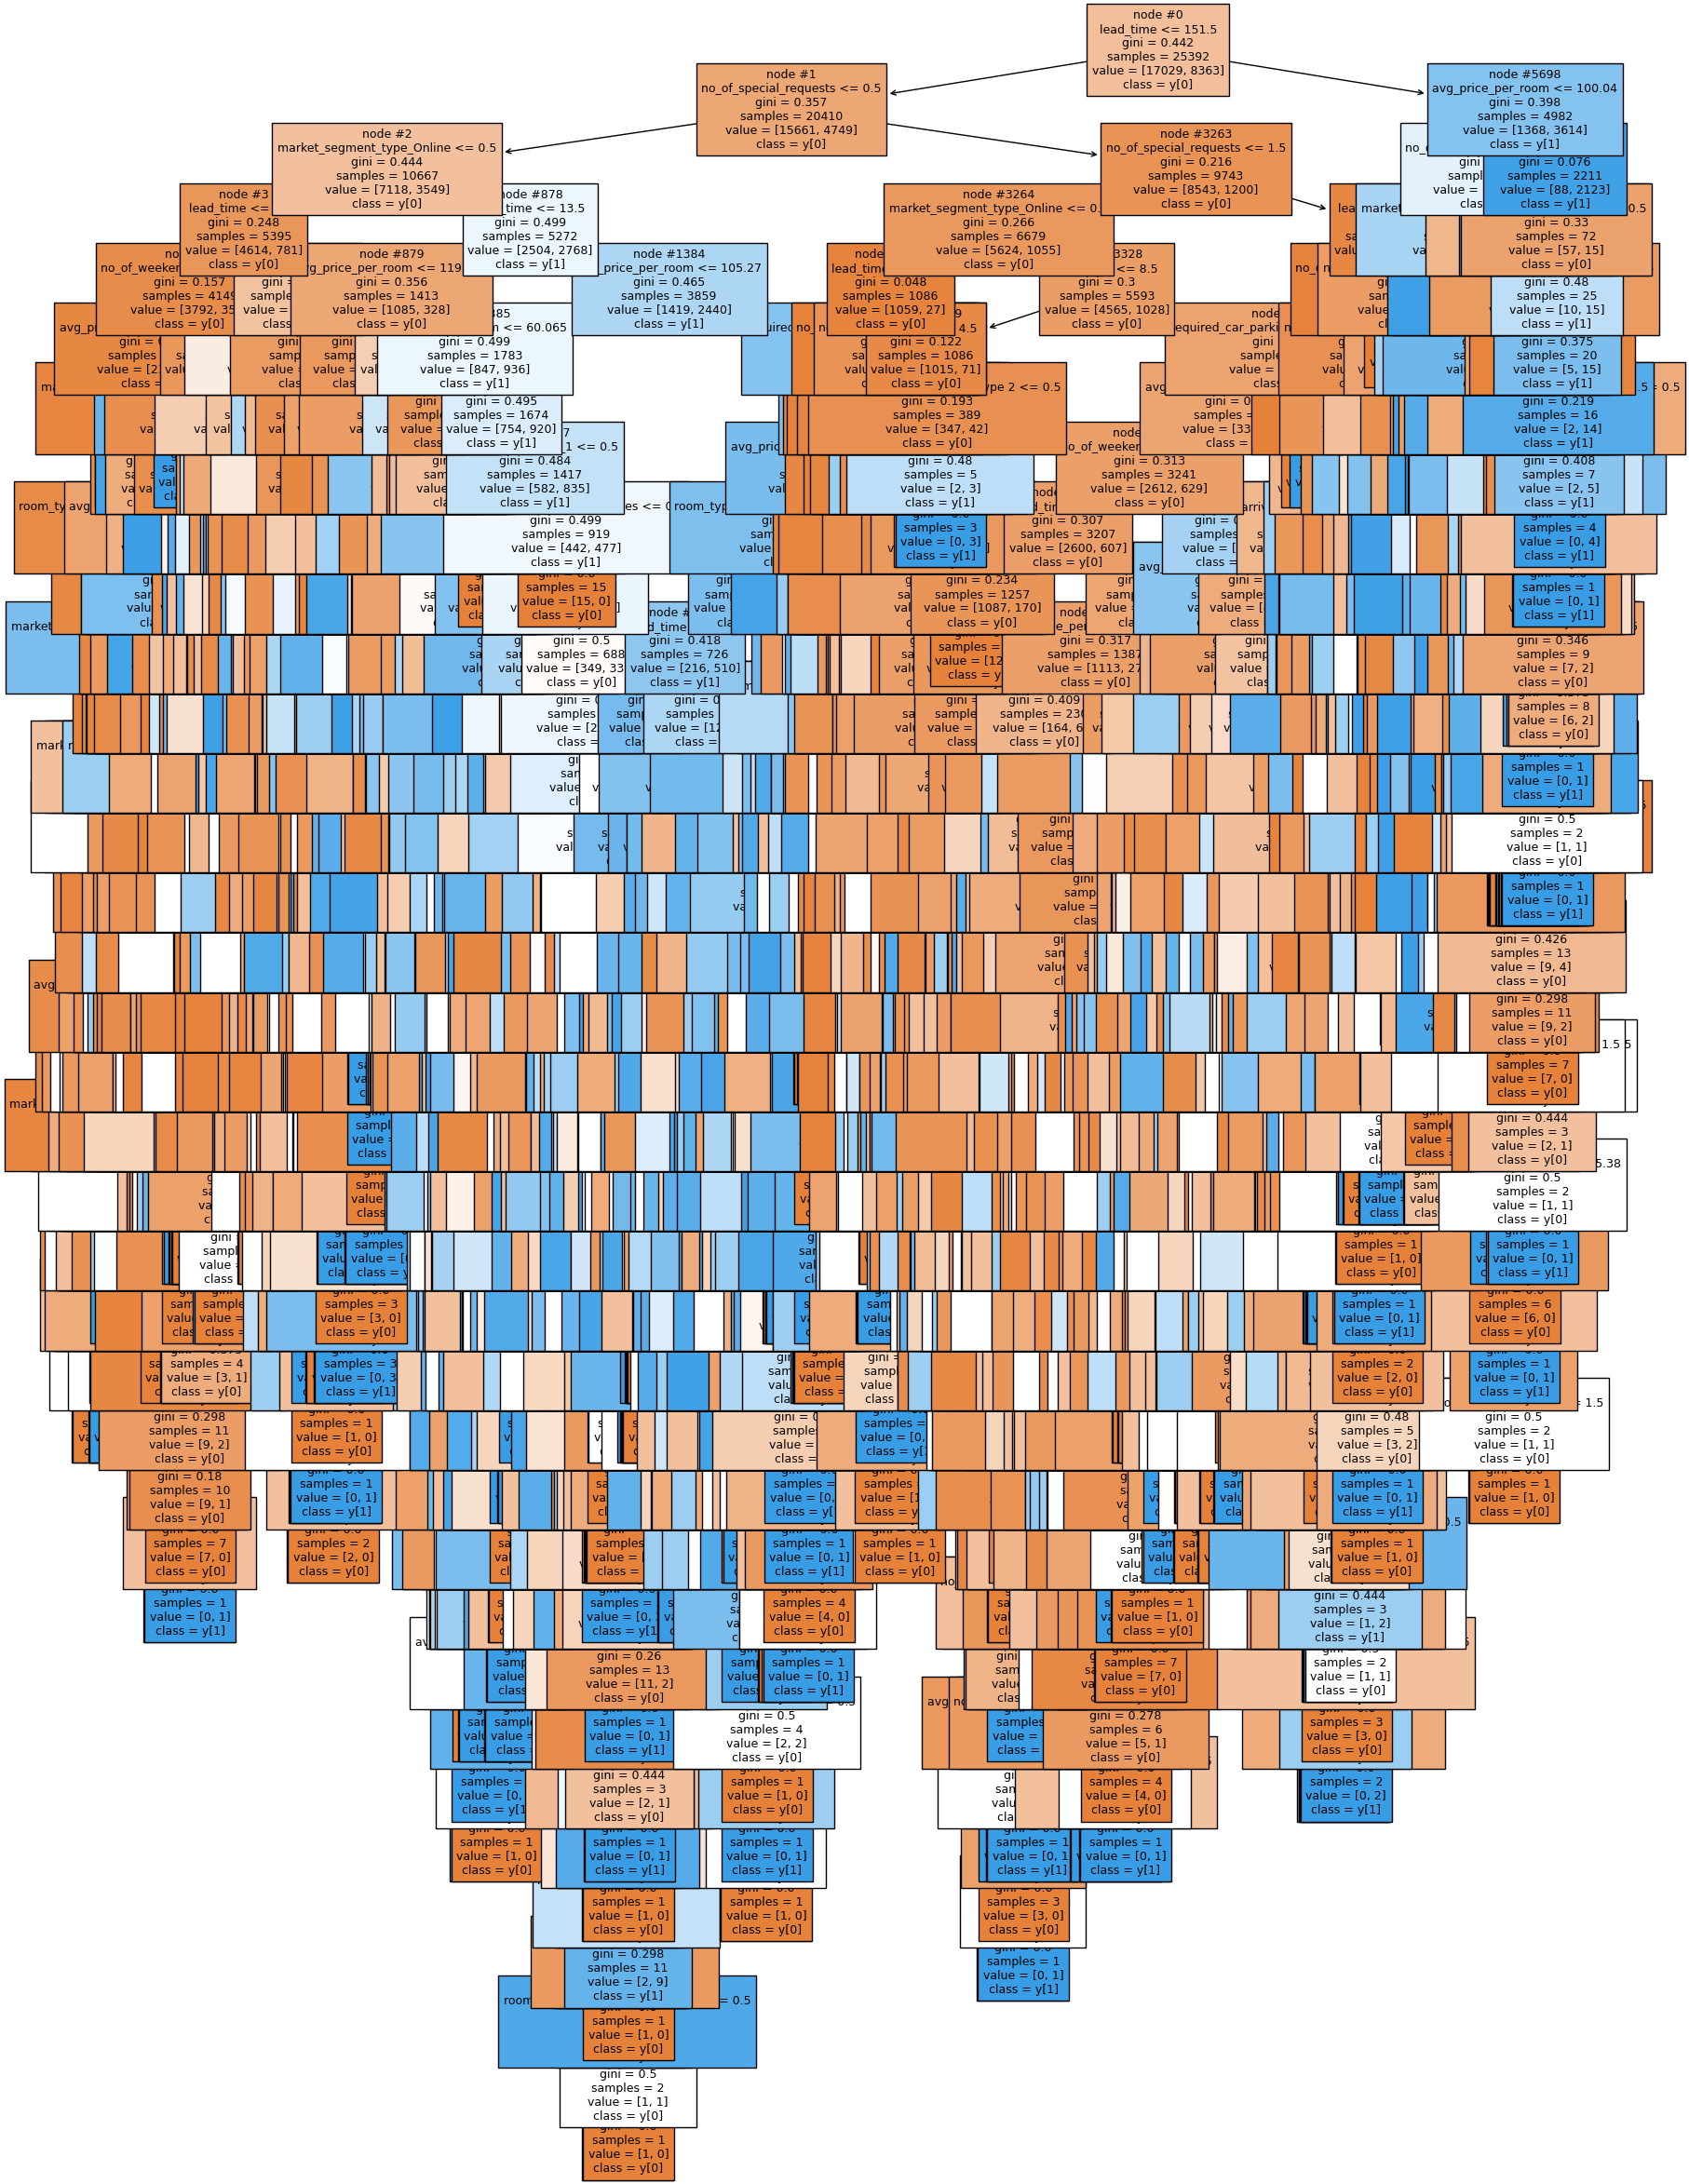

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(model0,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

The tree is very complex and overfitting, we will continue to prune the tree.

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
## add from article
parameters = {"max_depth": np.arange(2, 10, 1),
              "max_leaf_nodes": [50, 75, 150, 250],
              "min_samples_split": [5,10, 30, 50, 70],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
              }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_CART, y_train_CART)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_CART, y_train_CART)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, max_leaf_nodes=250,
                       min_impurity_decrease=0.0001, min_samples_split=5,
                       random_state=1)

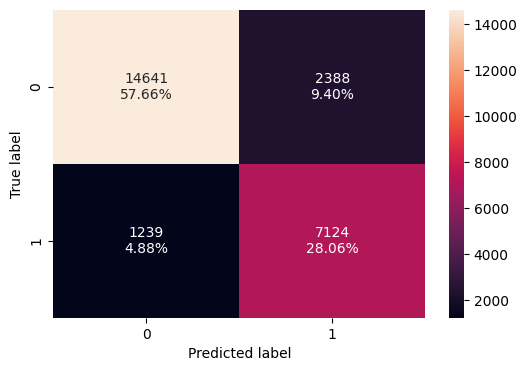

In [ ]:
confusion_matrix_sklearn(estimator, X_train_CART, y_train_CART)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train_CART, y_train_CART
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.85716 0.85185    0.74895 0.79709

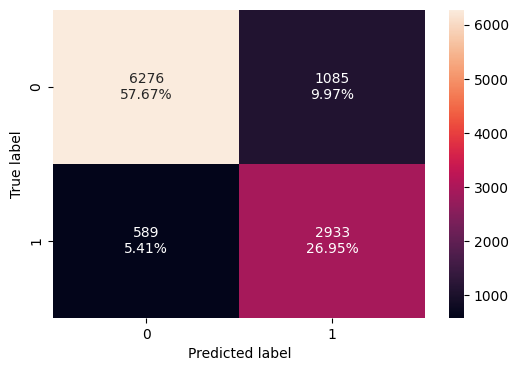

In [ ]:
confusion_matrix_sklearn(estimator, X_test_CART, y_test_CART)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test_CART, y_test_CART
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.84618 0.83277    0.72997 0.77798

* The model is giving a generalized result now since the f1 scores on both the train and test data are coming to be around 0.75 which shows that the model is able to generalize well on unseen data.

In [ ]:
feature_names = list(X_train_CART.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

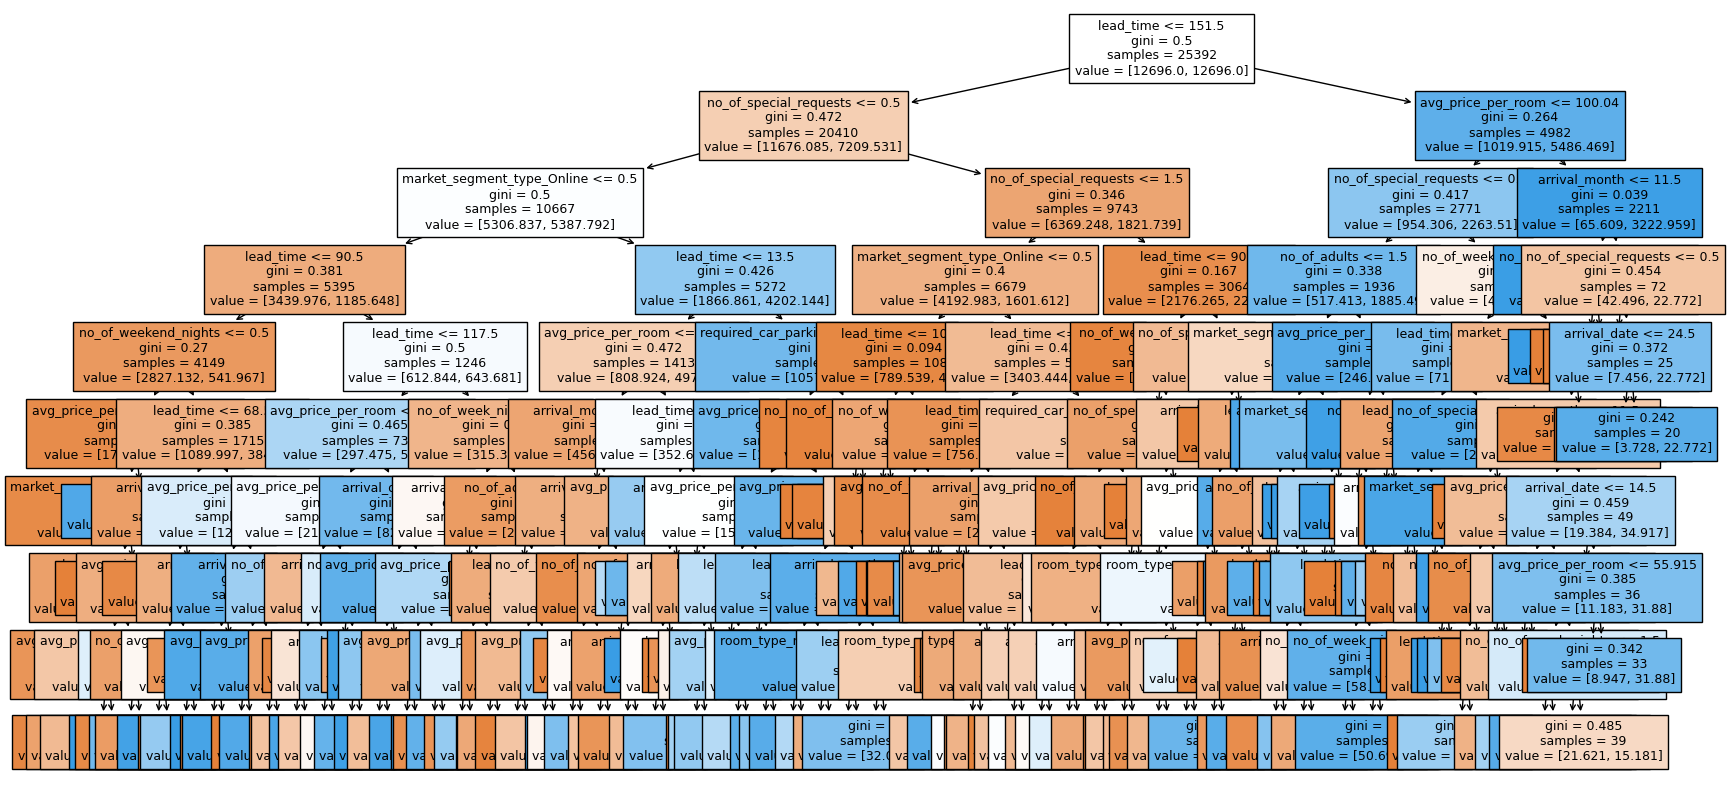

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- weights: [208.75, 54.65] class: 0
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |--- weights: [120.78, 54.65] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 12.14] class: 1
|   |   |   |   | 

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.02538013, 0.00046447, 0.02376916, 0.02319573,
       0.42224043, 0.04826324, 0.01967299, 0.        , 0.        ,
       0.10753451, 0.14278231, 0.0025525 , 0.        , 0.        ,
       0.01189867, 0.00078794, 0.        , 0.00043234, 0.00046664,
       0.        , 0.        , 0.        , 0.        , 0.01286487,
       0.15769408, 0.        ])

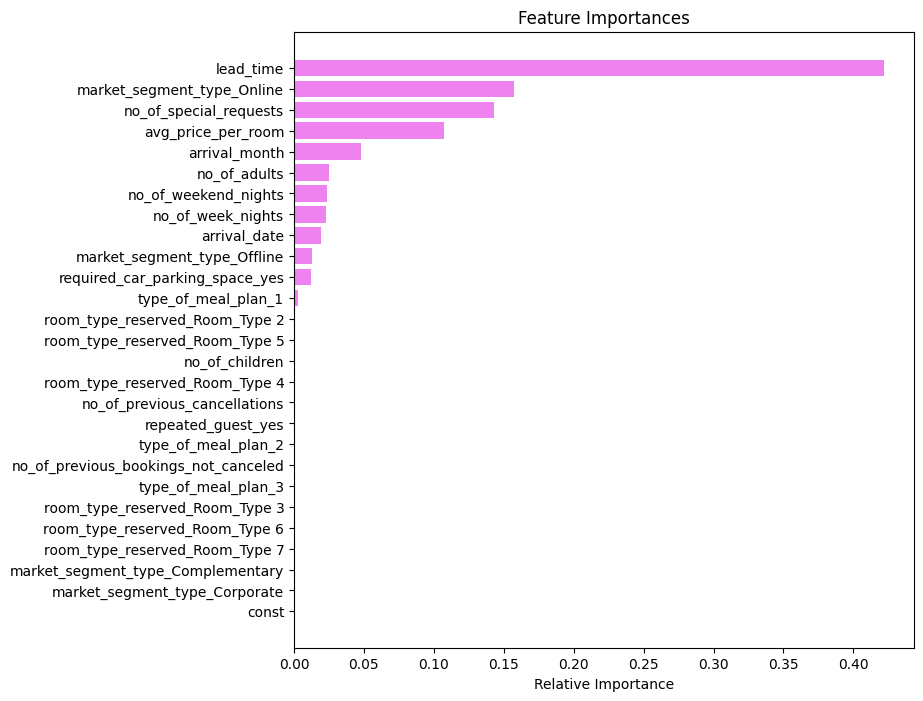

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, lead time is the most important features.

### Decision Tree (Post pruning)

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train_CART, y_train_CART)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1846     0.00890     0.32806
1847     0.00980     0.33786
1848     0.01272     0.35058
1849     0.03412     0.41882
1850     0.08118     0.50000

[1851 rows x 2 columns]

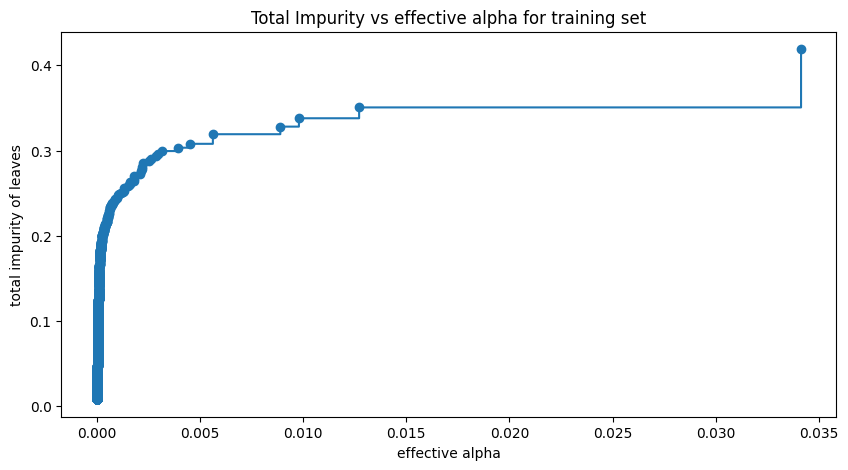

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train_CART, y_train_CART)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137099


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

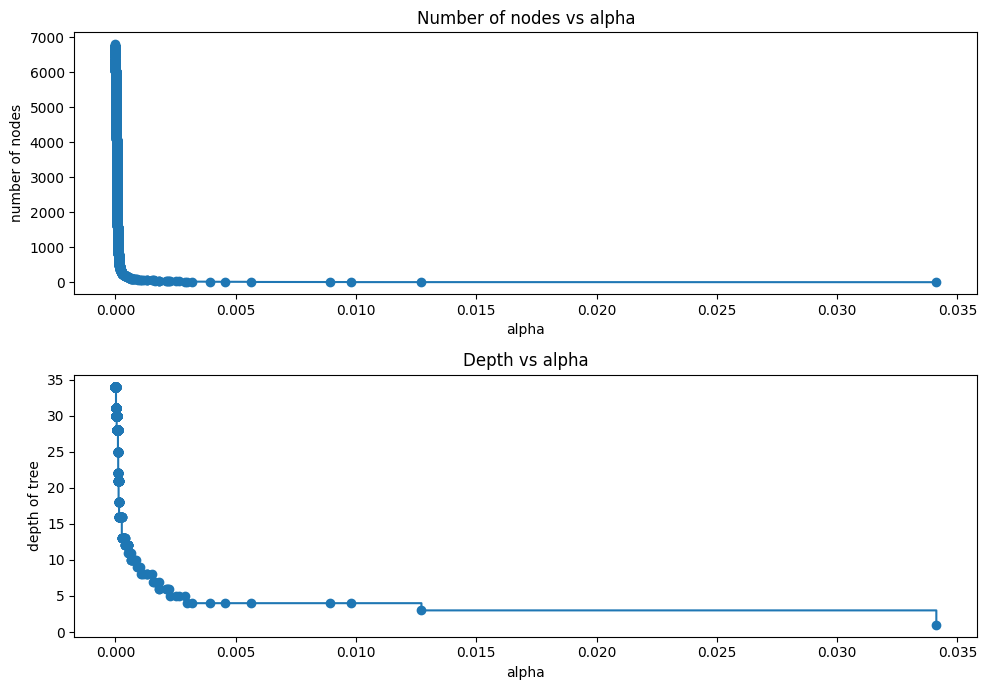

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train_CART)
    values_train = f1_score(y_train_CART, pred_train)
    f1_train.append(values_train)

In [ ]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test_CART)
    values_test = f1_score(y_test_CART, pred_test)
    f1_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train_CART, y_train_CART) for clf in clfs]
test_scores = [clf.score(X_test_CART, y_test_CART) for clf in clfs]

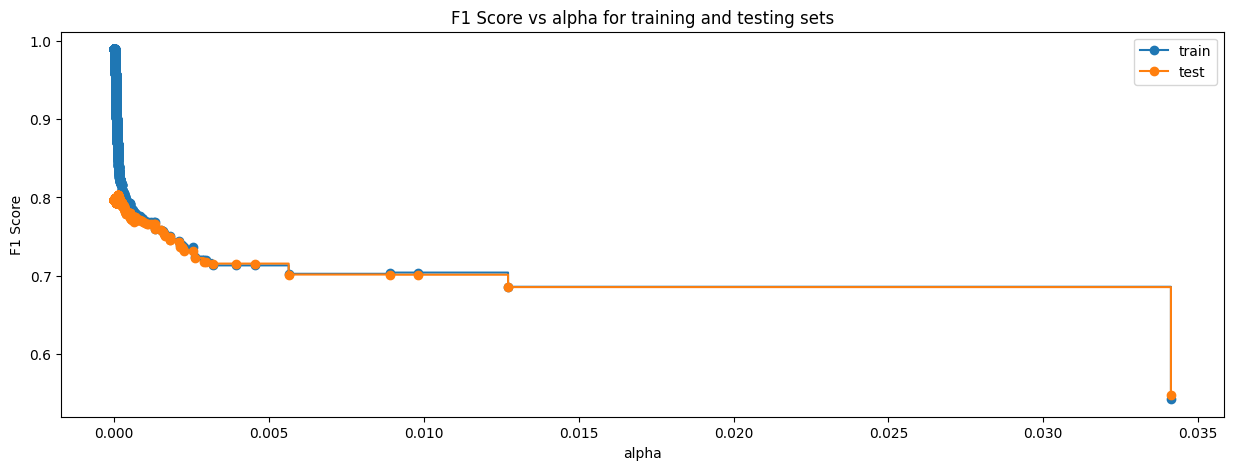

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013130344414478897,
                       class_weight='balanced', random_state=1)


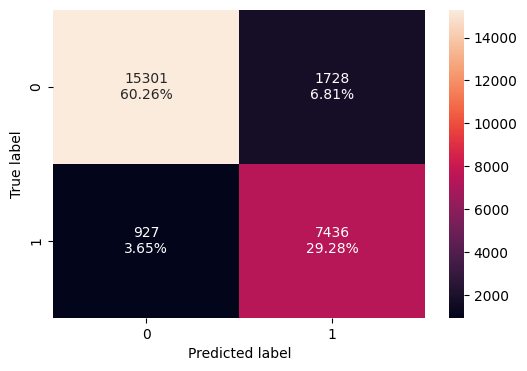

In [ ]:
confusion_matrix_sklearn(best_model, X_train_CART, y_train_CART)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train_CART, y_train_CART
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89544 0.88915    0.81144 0.84852

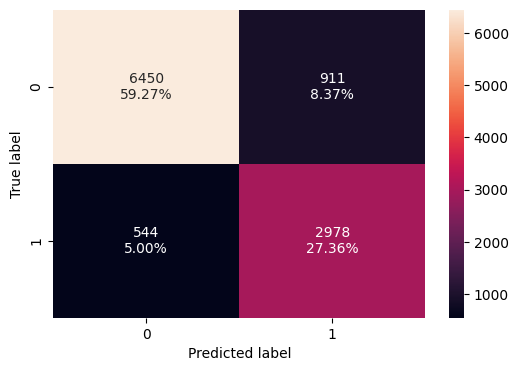

In [ ]:
confusion_matrix_sklearn(best_model, X_test_CART, y_test_CART)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test_CART, y_test_CART
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86631 0.84554    0.76575 0.80367

* In the post-pruned tree also, the model is giving a generalized F1 score since the F1 scores on both the train and test data are coming to be around 0.80 which shows that the model is able to generalize well on unseen data.

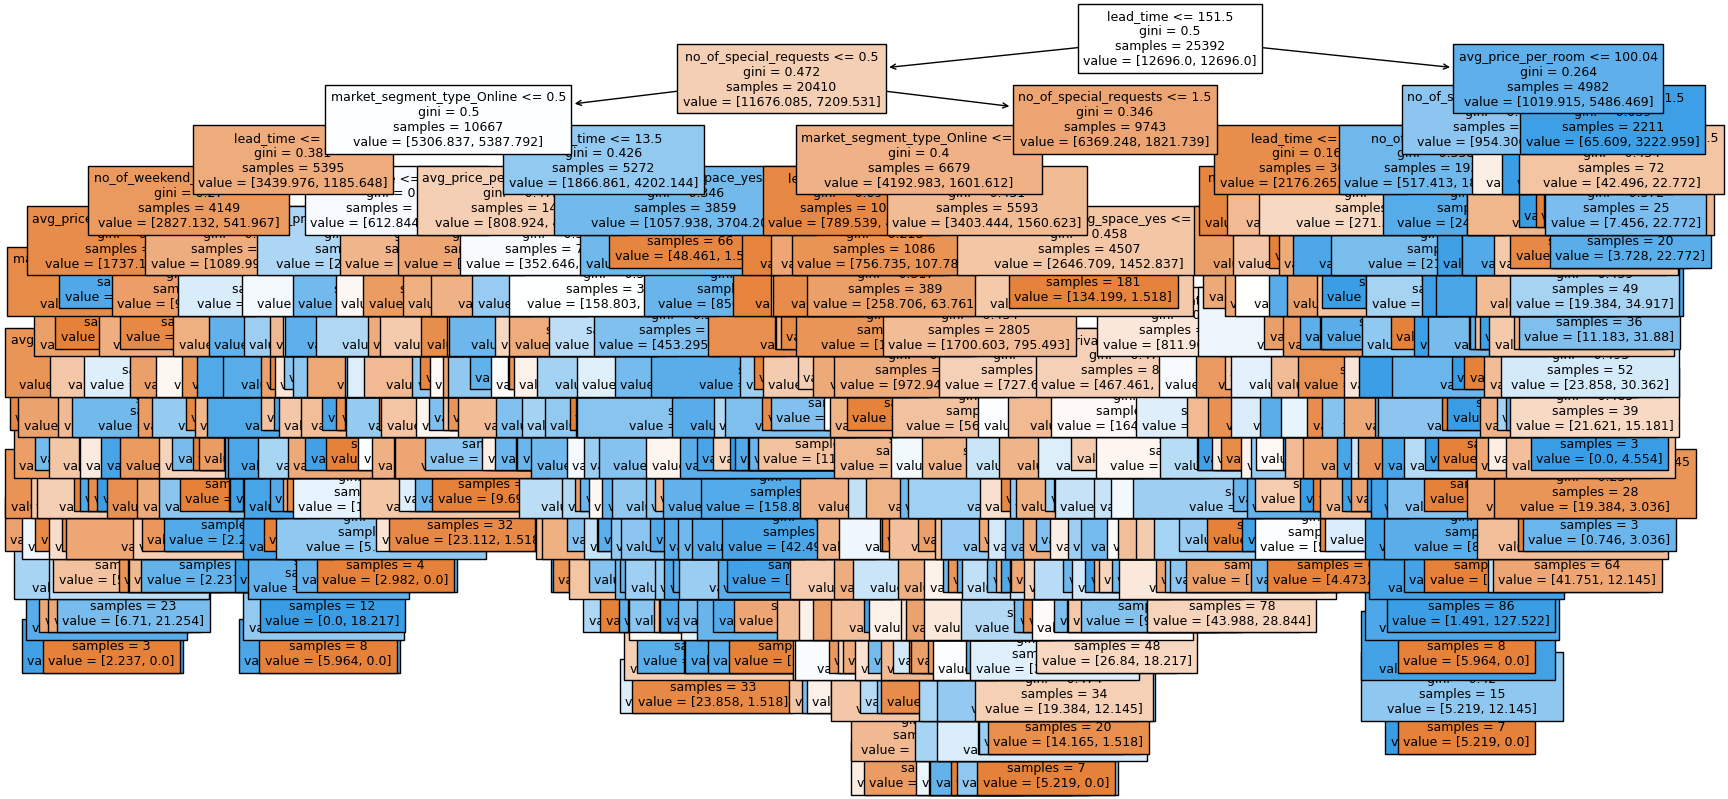

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

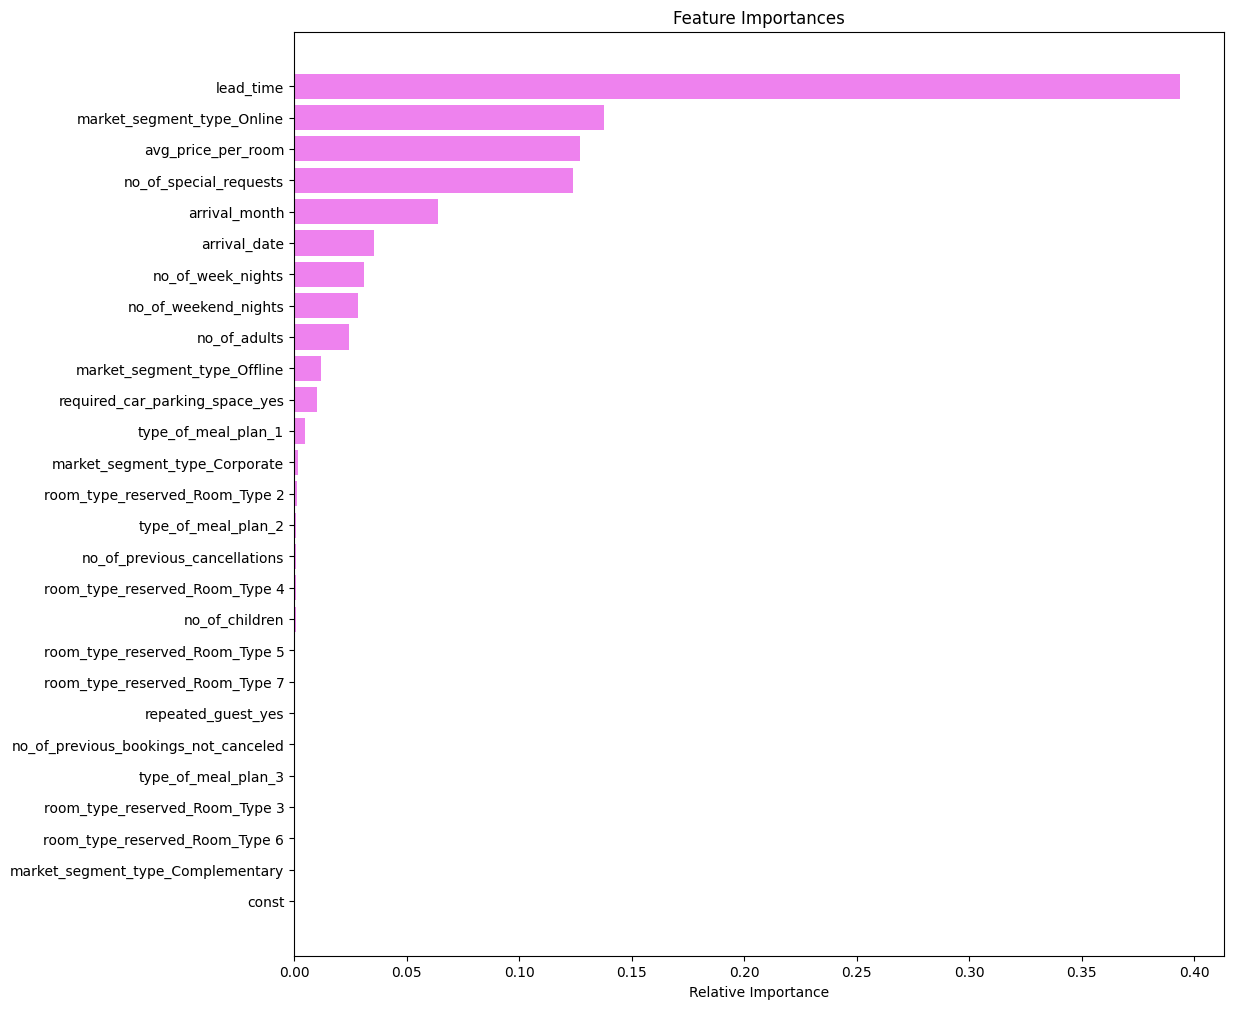

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time is the most important features for the post pruned tree

## Model Performance Comparison and Conclusions

#### Comparing Decision Tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.85716   
Recall                   0.98661                      0.85185   
Precision                0.99578                      0.74895   
F1                       0.99117                      0.79709   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89544  
Recall                          0.88915  
Precision                       0.81144  
F1                              0.84852

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86621                      0.84618   
Recall                   0.80778                      0.83277   
Precision                0.78504                      0.72997   
F1                       0.79625                      0.77798   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86631  
Recall                          0.84554  
Precision                       0.76575  
F1                              0.80367

The Decision Tree model with post-pruning demonstrates the highest F1 score, which is a well-balanced metric encompassing both precision and recall. This model consistently outperforms the alternatives, rendering it the optimal selection based on the F1 score. Its capacity to strike a favorable equilibrium between precision and recall deems it suitable for a wide array of applications, particularly those that prioritize the reduction of both false positives and false negatives.